### **Problem Statement:**
* Delhivery is the largest and fastest-growing fully integrated player in India by revenue in 
Fiscal 2021.
  1. The company wants to understand and process the data coming out of data engineering 
pipelines:
  2. Clean, sanitize and manipulate data to get useful features out of raw fields
 3.Make sense out of the raw data and help the data science team to build forecasting 
models on it

In [118]:
# downloading data to working directory
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181

--2023-04-23 10:22:46--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 108.157.172.176, 108.157.172.173, 108.157.172.10, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|108.157.172.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55617130 (53M) [text/plain]
Saving to: ‘delhivery_data.csv?1642751181.1’

delhivery_data.csv? 100%[===================>]  53.04M  40.3MB/s    in 1.3s    

2023-04-23 10:22:47 (40.3 MB/s) - ‘delhivery_data.csv?1642751181.1’ saved [55617130/55617130]



In [119]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.special import comb
from scipy.stats import binom
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF # empirical CDF\n",
from scipy.stats import norm,poisson,expon ## norm --> 'Normal' or \"Gaussian' "
from scipy.stats import ttest_ind,ttest_ind_from_stats,ttest_1samp,levene,shapiro,t,f_oneway,f,chi2_contingency,chi2,ttest_rel,kruskal,normaltest,anderson,spearmanr,boxcox,probplot
from datetime import datetime, timedelta
import statsmodels.api as sm
import warnings 
warnings.filterwarnings('ignore')

In [120]:
# assigning data to object
df=pd.read_csv("/content/delhivery_data.csv?1642751181")

In [121]:
#Exploring first five rows of data set
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [122]:
#Exploring last five rows of data set
df.tail()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630
144866,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 16:24:28.436231,70.039010,426.0,95.0,88.7319,4.484211,268.0,9.0,8.8088,29.777778


### **EDA**

In [123]:
# Checking dataset shape
df.shape

(144867, 24)

In [124]:
# Length of dataset
len(df)

144867

In [125]:
# Checking dataset datatypes
df.dtypes

data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
is_cutoff                            bool
cutoff_factor                       int64
cutoff_timestamp                   object
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
factor                            float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
segment_factor                    

In [126]:
#converting datetime column to datetime format
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['od_end_time'] = pd.to_datetime(df['od_end_time'])
df['cutoff_timestamp'] = pd.to_datetime(df['cutoff_timestamp'])

In [127]:
# Checking dataset datatypes
df.dtypes

data                                      object
trip_creation_time                datetime64[ns]
route_schedule_uuid                       object
route_type                                object
trip_uuid                                 object
source_center                             object
source_name                               object
destination_center                        object
destination_name                          object
od_start_time                     datetime64[ns]
od_end_time                       datetime64[ns]
start_scan_to_end_scan                   float64
is_cutoff                                   bool
cutoff_factor                              int64
cutoff_timestamp                  datetime64[ns]
actual_distance_to_destination           float64
actual_time                              float64
osrm_time                                float64
osrm_distance                            float64
factor                                   float64
segment_actual_time 

In [128]:
# information about the data
# column names, datatypes, non-null values, memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [129]:
df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [130]:
df.nunique()

data                                   2
trip_creation_time                 14817
route_schedule_uuid                 1504
route_type                             2
trip_uuid                          14817
source_center                       1508
source_name                         1498
destination_center                  1481
destination_name                    1468
od_start_time                      26369
od_end_time                        26369
start_scan_to_end_scan              1915
is_cutoff                              2
cutoff_factor                        501
cutoff_timestamp                   93180
actual_distance_to_destination    144515
actual_time                         3182
osrm_time                           1531
osrm_distance                     138046
factor                             45641
segment_actual_time                  747
segment_osrm_time                    214
segment_osrm_distance             113799
segment_factor                      5675
dtype: int64

### **Observations:**
* Delhivery Business case study having 144867 rows and 24 columns.
* Data set are containing four 'segment_factor','factor','cutoff_timestamp','cutoff_factor','is_cutoff' unknow fields.
* Out of total 19 known fields trip_creation_time, od_start_time,od_end_time are datetimestamp columns.
* Columns name data and route type are belongs to categorical type data.
* In this data set null values has been observed in columns source name and destination name.


In [131]:
# droping unknown data field
df = df.drop( columns=['segment_factor','factor','cutoff_timestamp','cutoff_factor','is_cutoff'])

In [132]:
# checking again shape of dataset
df.shape

(144867, 19)

### **Comments:**
* Unknown fields has been dropped from data set, Now data set having only 19 columns and 144867 rows

# **Data Transformation:**

In [133]:
# Performing Aggregation on data_set:
df_lv_1=df.groupby(['trip_uuid','source_center','destination_center']).agg({'data':'first',
                                                                            'trip_creation_time':'first',
                                                                            'route_type':'first',
                                                                            'source_name':'first',
                                                                              'destination_name':'last',
                                                                              'od_start_time':'first',
                                                                              'od_end_time':'first',
                                                                              'start_scan_to_end_scan':'first',
                                                                              'actual_distance_to_destination':'last',
                                                                              'actual_time':'last',
                                                                              'osrm_time':'last',
                                                                              'osrm_distance':'last',
                                                                              'segment_actual_time':'sum',
                                                                              'segment_osrm_time':'sum',
                                                                              'segment_osrm_distance':'sum'}).reset_index()
df_lv_1.sort_values(by = ['trip_uuid','od_start_time'],inplace = True, ignore_index = True)
df_lv_1

,trip_uuid,source_center,destination_center,data,trip_creation_time,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,IND462022AAA,IND209304AAA,training,2018-09-12 00:00:16.535741,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528
1,trip-153671041653548748,IND209304AAA,IND000000ACB,training,2018-09-12 00:00:16.535741,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205
2,trip-153671042288605164,IND572101AAA,IND561203AAB,training,2018-09-12 00:00:22.886430,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899
3,trip-153671042288605164,IND561203AAB,IND562101AAA,training,2018-09-12 00:00:22.886430,Carting,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995
4,trip-153671043369099517,IND562132AAA,IND000000ACB,training,2018-09-12 00:00:33.691250,FTL,Bangalore_Nelmngla_H (Karnataka),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:33.691250,2018-09-14 03:40:17.106733,3099.0,1689.964663,2736.0,1528.0,2072.8556,2700.0,1710.0,2227.5270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,trip-153861115439069069,IND628204AAA,IND627657AAA,test,2018-10-03 23:59:14.390954,Carting,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.0,42.1431
26364,trip-153861115439069069,IND627657AAA,IND628613AAA,test,2018-10-03 23:59:14.390954,Carting,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),Peikulam_SriVnktpm_D (Tamil Nadu),2018-10-04 03:31:11.183797,2018-10-04 04:16:39.894872,45.0,17.373209,33.0,31.0,25.7087,32.0,30.0,25.7087
26365,trip-153861115439069069,IND628613AAA,IND627005AAA,test,2018-10-03 23:59:14.390954,Carting,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,77.0,78.5869
26366,trip-153861118270144424,IND583201AAA,IND583119AAA,test,2018-10-03 23:59:42.701692,FTL,Hospet (Karnataka),Sandur_WrdN1DPP_D (Karnataka),2018-10-04 02:51:44.712656,2018-10-04 03:58:40.726547,66.0,25.534793,42.0,26.0,28.0484,41.0,25.0,28.0484


In [134]:
df_final=df_lv_1.groupby(['trip_uuid']).agg({'data':'first','source_center':'first','destination_center':'last',
                                                                            'trip_creation_time':'first',
                                                                            'route_type':'first',
                                                                            'source_name':'first',
                                                                              'destination_name':'last',
                                                                              'od_start_time':'first',
                                                                              'od_end_time':'last',
                                                                              'start_scan_to_end_scan':'sum',
                                                                              'actual_distance_to_destination':'sum',
                                                                              'actual_time':'sum',
                                                                              'osrm_time':'sum',
                                                                              'osrm_distance':'sum',
                                                                              'segment_actual_time':'sum',
                                                                              'segment_osrm_time':'sum',
                                                                              'segment_osrm_distance':'sum'}).reset_index()

df_final

,trip_uuid,data,source_center,destination_center,trip_creation_time,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,training,IND462022AAA,IND000000ACB,2018-09-12 00:00:16.535741,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733
1,trip-153671042288605164,training,IND572101AAA,IND562101AAA,2018-09-12 00:00:22.886430,Carting,Tumkur_Veersagr_I (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894
2,trip-153671043369099517,training,IND562132AAA,IND160002AAC,2018-09-12 00:00:33.691250,FTL,Bangalore_Nelmngla_H (Karnataka),Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678
3,trip-153671046011330457,training,IND400072AAB,IND401104AAA,2018-09-12 00:01:00.113710,Carting,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
4,trip-153671052974046625,training,IND583101AAA,IND583101AAA,2018-09-12 00:02:09.740725,FTL,Bellary_Dc (Karnataka),Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,test,IND160002AAC,IND160002AAC,2018-10-03 23:55:56.258533,Carting,Chandigarh_Mehmdpur_H (Punjab),Chandigarh_Mehmdpur_H (Punjab),2018-10-03 23:55:56.258533,2018-10-04 06:41:25.409035,257.0,57.762332,83.0,62.0,73.4630,82.0,62.0,64.8551
14813,trip-153861104386292051,test,IND121004AAB,IND121004AAA,2018-10-03 23:57:23.863155,Carting,FBD_Balabhgarh_DPC (Haryana),Faridabad_Blbgarh_DC (Haryana),2018-10-03 23:57:23.863155,2018-10-04 00:57:59.294434,60.0,15.513784,21.0,12.0,16.0882,21.0,11.0,16.0883
14814,trip-153861106442901555,test,IND209304AAA,IND209304AAA,2018-10-03 23:57:44.429324,Carting,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-10-03 23:57:44.429324,2018-10-04 06:59:51.621332,421.0,38.684839,282.0,48.0,58.9037,281.0,88.0,104.8866
14815,trip-153861115439069069,test,IND627005AAA,IND627005AAA,2018-10-03 23:59:14.390954,Carting,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-03 23:59:14.390954,2018-10-04 05:47:45.162682,347.0,134.723836,264.0,179.0,171.1103,258.0,221.0,223.5324


In [135]:
df_final.isna().sum()

trip_uuid                          0
data                               0
source_center                      0
destination_center                 0
trip_creation_time                 0
route_type                         0
source_name                       10
destination_name                   8
od_start_time                      0
od_end_time                        0
start_scan_to_end_scan             0
actual_distance_to_destination     0
actual_time                        0
osrm_time                          0
osrm_distance                      0
segment_actual_time                0
segment_osrm_time                  0
segment_osrm_distance              0
dtype: int64

In [136]:
df_final.nunique()

trip_uuid                         14817
data                                  2
source_center                       868
destination_center                  956
trip_creation_time                14817
route_type                            2
source_name                         867
destination_name                    950
od_start_time                     14817
od_end_time                       14817
start_scan_to_end_scan             2208
actual_distance_to_destination    14801
actual_time                        1853
osrm_time                           817
osrm_distance                     14734
segment_actual_time                1890
segment_osrm_time                  1242
segment_osrm_distance             14754
dtype: int64

### **Observations:**
* After performing aggregation on dataset,14817 unique trip id has been found.
* In this data set, total 868 unique source centre has been detected.
* Total Unique destination centre are 956. 



In [137]:
# Creating feature name of 'diff' which is difference between od_end_time and od_start_time
df_final['diff'] = (df_final['od_end_time'] - df_final['od_start_time'])/np.timedelta64(1,'m')

In [138]:
df_final.shape

(14817, 19)

In [139]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14817 non-null  object        
 1   data                            14817 non-null  object        
 2   source_center                   14817 non-null  object        
 3   destination_center              14817 non-null  object        
 4   trip_creation_time              14817 non-null  datetime64[ns]
 5   route_type                      14817 non-null  object        
 6   source_name                     14807 non-null  object        
 7   destination_name                14809 non-null  object        
 8   od_start_time                   14817 non-null  datetime64[ns]
 9   od_end_time                     14817 non-null  datetime64[ns]
 10  start_scan_to_end_scan          14817 non-null  float64       
 11  ac

In [140]:
df_final.isna().sum()

trip_uuid                          0
data                               0
source_center                      0
destination_center                 0
trip_creation_time                 0
route_type                         0
source_name                       10
destination_name                   8
od_start_time                      0
od_end_time                        0
start_scan_to_end_scan             0
actual_distance_to_destination     0
actual_time                        0
osrm_time                          0
osrm_distance                      0
segment_actual_time                0
segment_osrm_time                  0
segment_osrm_distance              0
diff                               0
dtype: int64

In [141]:
#  just checking Rows, which are having null values.
df_final[df_final['source_name'].isna()]

,trip_uuid,data,source_center,destination_center,trip_creation_time,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,diff
8762,trip-153776806236494354,training,IND282002AAD,IND205001AAB,2018-09-24 05:47:42.365186,FTL,None,Mainpuri_Agraroad_I (Uttar Pradesh),2018-09-24 13:50:39.828453,2018-09-24 18:11:47.901629,261.0,236.815038,258.0,234.0,294.2514,257.0,237.0,315.5863,261.134553
9835,trip-153791004076950775,training,IND577116AAA,IND577101AAA,2018-09-25 21:14:00.769759,FTL,None,Chikmagalur_DC (Karnataka),2018-09-26 02:05:06.856776,2018-09-26 02:49:42.279553,44.0,35.760236,42.0,46.0,49.5545,41.0,53.0,52.0094,44.590380
10562,trip-153800051661903546,training,IND331022A1B,IND331001A1C,2018-09-26 22:21:56.619259,FTL,None,None,2018-09-27 03:19:14.797080,2018-09-27 05:28:00.922915,128.0,50.844665,128.0,49.0,60.9205,127.0,48.0,60.9205,128.768764
11468,trip-153811367563100850,test,IND282002AAD,IND205001AAB,2018-09-28 05:47:55.631256,FTL,None,Mainpuri_Agraroad_I (Uttar Pradesh),2018-09-28 14:57:13.276811,2018-09-28 19:08:56.116437,251.0,99.115749,211.0,88.0,110.1333,210.0,99.0,126.3234,251.713994
12097,trip-153820032399976293,test,IND282002AAD,IND205001AAB,2018-09-29 05:52:04.000013,FTL,None,Mainpuri_Agraroad_I (Uttar Pradesh),2018-09-29 14:25:12.074915,2018-09-29 18:43:56.915263,258.0,99.026861,182.0,88.0,110.1448,181.0,101.0,126.5971,258.747339
13104,trip-153835867702133730,test,IND282002AAD,IND281004AAA,2018-10-01 01:51:17.021624,FTL,None,Mathura_DC (Uttar Pradesh),2018-10-01 01:51:17.021624,2018-10-01 04:57:32.298263,186.0,44.104960,117.0,66.0,80.9495,117.0,96.0,95.9942,186.254611
13168,trip-153836697913613926,test,IND282002AAD,IND205001AAB,2018-10-01 04:09:39.136394,FTL,None,Mainpuri_Agraroad_I (Uttar Pradesh),2018-10-01 14:14:21.656658,2018-10-01 18:26:35.386184,252.0,99.015353,192.0,88.0,110.1598,190.0,90.0,112.7418,252.228825
13644,trip-153843937115921268,test,IND282002AAD,IND281004AAA,2018-10-02 00:16:11.159597,FTL,None,Mathura_DC (Uttar Pradesh),2018-10-02 00:16:11.159597,2018-10-02 02:54:49.002258,158.0,44.137149,93.0,66.0,80.9657,92.0,94.0,95.8826,158.630711
13793,trip-153846056503320607,test,IND282002AAD,IND205001AAB,2018-10-02 06:09:25.033504,FTL,None,Mainpuri_Agraroad_I (Uttar Pradesh),2018-10-02 15:01:17.497129,2018-10-02 19:20:39.376499,259.0,99.063008,179.0,88.0,110.1801,176.0,88.0,110.2031,259.364656
14199,trip-153852612674280168,test,IND282002AAD,IND281004AAA,2018-10-03 00:22:06.743062,FTL,None,Mathura_DC (Uttar Pradesh),2018-10-03 00:22:06.743062,2018-10-03 03:09:39.954014,167.0,44.089609,86.0,66.0,80.8431,86.0,92.0,90.9055,167.553516


In [142]:
# just checking Rows, which are having null values.
df_final[df_final['destination_name'].isna()]

,trip_uuid,data,source_center,destination_center,trip_creation_time,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,diff
5289,trip-153733592611290696,training,IND000000ACB,IND122015AAC,2018-09-19 05:45:26.113345,Carting,Gurgaon_Bilaspur_HB (Haryana),None,2018-09-19 05:45:26.113345,2018-09-19 09:11:40.486648,206.0,30.407059,73.0,34.0,35.3948,72.0,36.0,39.4788,206.239555
5778,trip-153739792417979729,training,IND504215AAA,IND505326AAB,2018-09-19 22:58:44.180028,FTL,Luxettipet_ShivaDPP_D (Telangana),None,2018-09-20 06:17:36.456909,2018-09-20 09:15:28.704827,177.0,51.604090,157.0,58.0,64.6296,156.0,58.0,64.6296,177.870799
5961,trip-153741501937042684,training,IND000000ACB,IND122015AAC,2018-09-20 03:43:39.370661,Carting,Gurgaon_Bilaspur_HB (Haryana),None,2018-09-20 03:43:39.370661,2018-09-20 08:28:34.545131,284.0,29.227677,96.0,35.0,35.5767,95.0,33.0,35.5767,284.919575
8796,trip-153777348608709328,training,IND202001AAB,IND282002AAD,2018-09-24 07:18:06.087341,FTL,Aligarh_KhirByps_I (Uttar Pradesh),None,2018-09-24 15:02:13.760270,2018-09-24 18:49:23.454535,227.0,76.647402,183.0,74.0,92.1309,182.0,74.0,92.1350,227.161571
10562,trip-153800051661903546,training,IND331022A1B,IND331001A1C,2018-09-26 22:21:56.619259,FTL,None,None,2018-09-27 03:19:14.797080,2018-09-27 05:28:00.922915,128.0,50.844665,128.0,49.0,60.9205,127.0,48.0,60.9205,128.768764
13313,trip-153839879406683648,test,IND131028AAB,IND250002AAC,2018-10-01 12:59:54.067059,FTL,Sonipat_Kundli_H (Haryana),None,2018-10-01 12:59:54.067059,2018-10-02 00:18:03.353488,678.0,54.120325,405.0,72.0,89.7878,405.0,72.0,89.7878,678.154774
13408,trip-153841850974526339,test,IND110037AAM,IND250002AAC,2018-10-01 18:28:29.745506,FTL,Delhi_Airport_H (Delhi),None,2018-10-01 18:28:29.745506,2018-10-03 19:00:09.533421,2911.0,70.627876,1496.0,92.0,88.6467,1495.0,131.0,121.2165,2911.663132
14453,trip-153857174991144707,test,IND110037AAM,IND250002AAC,2018-10-03 13:02:29.911693,FTL,Delhi_Airport_H (Delhi),None,2018-10-03 13:02:29.911693,2018-10-03 19:47:17.103230,404.0,69.948877,114.0,96.0,91.8598,112.0,98.0,91.8108,404.786526


In [143]:
# As the nulls values entry is very less compare to the size of dataset.
d_f=df_final.dropna(axis=0,subset=["source_name","destination_name"])

In [144]:
d_f


,trip_uuid,data,source_center,destination_center,trip_creation_time,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,diff
0,trip-153671041653548748,training,IND462022AAA,IND000000ACB,2018-09-12 00:00:16.535741,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,2260.109800
1,trip-153671042288605164,training,IND572101AAA,IND562101AAA,2018-09-12 00:00:22.886430,Carting,Tumkur_Veersagr_I (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894,181.611874
2,trip-153671043369099517,training,IND562132AAA,IND160002AAC,2018-09-12 00:00:33.691250,FTL,Bangalore_Nelmngla_H (Karnataka),Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678,3934.362520
3,trip-153671046011330457,training,IND400072AAB,IND401104AAA,2018-09-12 00:01:00.113710,Carting,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766,100.494935
4,trip-153671052974046625,training,IND583101AAA,IND583101AAA,2018-09-12 00:02:09.740725,FTL,Bellary_Dc (Karnataka),Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919,718.349042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,test,IND160002AAC,IND160002AAC,2018-10-03 23:55:56.258533,Carting,Chandigarh_Mehmdpur_H (Punjab),Chandigarh_Mehmdpur_H (Punjab),2018-10-03 23:55:56.258533,2018-10-04 06:41:25.409035,257.0,57.762332,83.0,62.0,73.4630,82.0,62.0,64.8551,405.485842
14813,trip-153861104386292051,test,IND121004AAB,IND121004AAA,2018-10-03 23:57:23.863155,Carting,FBD_Balabhgarh_DPC (Haryana),Faridabad_Blbgarh_DC (Haryana),2018-10-03 23:57:23.863155,2018-10-04 00:57:59.294434,60.0,15.513784,21.0,12.0,16.0882,21.0,11.0,16.0883,60.590521
14814,trip-153861106442901555,test,IND209304AAA,IND209304AAA,2018-10-03 23:57:44.429324,Carting,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-10-03 23:57:44.429324,2018-10-04 06:59:51.621332,421.0,38.684839,282.0,48.0,58.9037,281.0,88.0,104.8866,422.119867
14815,trip-153861115439069069,test,IND627005AAA,IND627005AAA,2018-10-03 23:59:14.390954,Carting,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-03 23:59:14.390954,2018-10-04 05:47:45.162682,347.0,134.723836,264.0,179.0,171.1103,258.0,221.0,223.5324,348.512862


# **Feature Engineering:** 

In [145]:
# Adding three more columns while extracting date and time from trip_creation_time column.
d_f['date'] = pd.to_datetime(d_f['trip_creation_time']).dt.date
d_f["day"] = pd.to_datetime(d_f["date"]).dt.day
d_f["month"] = pd.to_datetime(d_f["date"]).dt.month
d_f["year"] = pd.to_datetime(d_f["date"]).dt.year

In [146]:
# created features from time 
d_f.iloc[:,-4:].head(5)

,date,day,month,year
0,2018-09-12,12,9,2018
1,2018-09-12,12,9,2018
2,2018-09-12,12,9,2018
3,2018-09-12,12,9,2018
4,2018-09-12,12,9,2018


In [147]:
# Adding four more feature with source state,city, destination state and city name.
d_f['source_city'] = d_f['source_name'].str.replace("_"," ").str.split().str.get(0)
d_f['source_state'] = d_f['source_name'].str.extract('.*\((.*)\).*')
d_f['destination_city'] = d_f['destination_name'].str.replace("_"," ").str.split().str.get(0)
d_f['destination_state'] = d_f['destination_name'].str.extract('.*\((.*)\).*')

In [148]:
# created features from source and destination centers 
d_f.iloc[:,-4:].head(5)

,source_city,source_state,destination_city,destination_state
0,Bhopal,Madhya Pradesh,Gurgaon,Haryana
1,Tumkur,Karnataka,Chikblapur,Karnataka
2,Bangalore,Karnataka,Chandigarh,Punjab
3,Mumbai,Maharashtra,Mumbai,Maharashtra
4,Bellary,Karnataka,Bellary,Karnataka


In [149]:
d_f.describe(include=["int","float"])

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,diff,day,month,year
count,14800.000000,14800.000000,14800.000000,14800.000000,14800.000000,14800.000000,14800.000000,14800.000000,14800.000000,14800.000000,14800.000000,14800.0
mean,530.956824,164.583349,357.282905,161.478851,204.472239,354.028919,181.056284,223.341203,547.628388,18.376486,9.120270,2018.0
std,658.712230,305.543364,561.595093,271.498419,370.584337,556.443324,314.703250,416.842088,668.669716,7.886717,0.325288,0.0
min,23.000000,9.002461,9.000000,6.000000,9.072900,9.000000,6.000000,9.072900,23.461468,1.000000,9.000000,2018.0
25%,149.000000,22.786366,67.000000,29.000000,30.775025,66.000000,30.000000,32.617700,151.120639,14.000000,9.000000,2018.0
50%,280.000000,48.463337,149.000000,60.000000,65.591250,147.000000,65.000000,70.113450,288.850851,19.000000,9.000000,2018.0
75%,638.000000,164.705551,370.000000,168.250000,208.632775,367.000000,185.000000,218.917675,673.576438,25.000000,9.000000,2018.0
max,7898.000000,2186.531787,6265.000000,2032.000000,2840.081000,6230.000000,2564.000000,3523.632400,7898.551955,30.000000,10.000000,2018.0


In [150]:
d_f.describe(include=["object"])

,trip_uuid,data,source_center,destination_center,route_type,source_name,destination_name,date,source_city,source_state,destination_city,destination_state
count,14800,14800,14800,14800,14800,14800,14800,14800,14800,14800,14800,14800
unique,14800,2,865,951,2,866,949,22,666,29,760,32
top,trip-153671041653548748,training,IND000000ACB,IND000000ACB,Carting,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),2018-09-18,Gurgaon,Maharashtra,Mumbai,Maharashtra
freq,1,10647,946,813,8906,946,813,791,1022,2682,1127,2591


### **Observations:**
* As per statistical summary highest order of source city is Gurgaon.
* Highest order delivered by state, that is Maharashtra.
* Highest order received by Mumbai city.
* Highest order received by state-wise is Maharashtra.
* Most preferred route type is carting.
* Most of the data entries belongs to the training category.

In [151]:
# checking data under unique trip uuid
d_f.groupby('data')['trip_uuid'].nunique().to_frame().T

data,test,training
trip_uuid,4153,10647


In [152]:
# checking route type under unique trip uuid
d_f.groupby('route_type')['trip_uuid'].nunique().to_frame().T

route_type,Carting,FTL
trip_uuid,8906,5894


In [153]:
# checking day under unique trip uuid
d_f.groupby('day')['trip_uuid'].nunique().sort_values(ascending=False)

day
18    791
15    783
13    750
12    747
22    740
21    740
17    722
14    712
20    703
25    696
26    684
19    674
24    658
27    652
23    631
3     629
16    616
28    607
29    606
1     601
2     550
30    508
Name: trip_uuid, dtype: int64

In [154]:
# checking month under unique trip uuid
d_f.groupby('month')['trip_uuid'].nunique().to_frame().T

month,9,10
trip_uuid,13020,1780


### **Observations:**
* In this data set, 60% of the order delivered through carting and for rest of the Full truck load (FTL) is preferred.
* Order frequency is independent from days as we can see it is more or less same across the whole month.
* Data set entries belongs to two months only that is September and October.


In [155]:
# checking source_state under unique trip uuid
d_f.groupby('source_state')['trip_uuid'].nunique().sort_values(ascending=False)

source_state
Maharashtra               2682
Karnataka                 2229
Haryana                   1681
Tamil Nadu                1085
Delhi                      791
Telangana                  779
Gujarat                    746
Uttar Pradesh              720
West Bengal                677
Punjab                     630
Rajasthan                  493
Andhra Pradesh             407
Bihar                      358
Madhya Pradesh             332
Kerala                     289
Assam                      273
Jharkhand                  160
Uttarakhand                114
Orissa                     107
Goa                         65
Chandigarh                  48
Chhattisgarh                43
Himachal Pradesh            34
Jammu & Kashmir             17
Dadra and Nagar Haveli      15
Pondicherry                 12
Nagaland                     5
Mizoram                      4
Arunachal Pradesh            4
Name: trip_uuid, dtype: int64

In [156]:
# checking source_city under unique trip uuid
d_f.groupby('source_city')['trip_uuid'].nunique().sort_values(ascending=False).to_frame().head(20)

,trip_uuid
source_city,
Gurgaon,1022
Bengaluru,1015
Mumbai,893
Bhiwandi,811
Bangalore,755
Delhi,618
Hyderabad,562
Pune,445
Chandigarh,418


In [157]:
# checking destination_state under unique trip uuid
d_f.groupby('destination_state')['trip_uuid'].nunique().sort_values(ascending=False)

destination_state
Maharashtra               2591
Karnataka                 2275
Haryana                   1667
Tamil Nadu                1072
Telangana                  838
Gujarat                    746
Uttar Pradesh              732
West Bengal                708
Punjab                     693
Delhi                      675
Rajasthan                  523
Andhra Pradesh             414
Bihar                      363
Madhya Pradesh             337
Kerala                     273
Assam                      234
Jharkhand                  168
Orissa                     119
Uttarakhand                113
Goa                         65
Chhattisgarh                43
Himachal Pradesh            40
Chandigarh                  29
Arunachal Pradesh           23
Dadra and Nagar Haveli      17
Jammu & Kashmir             15
Pondicherry                 10
Meghalaya                    8
Mizoram                      6
Daman & Diu                  1
Nagaland                     1
Tripura              

In [158]:
# checking destination_city under unique trip uuid
d_f.groupby('destination_city')['trip_uuid'].nunique().sort_values(ascending=False).to_frame().head(20)

,trip_uuid
destination_city,
Mumbai,1127
Bengaluru,1056
Gurgaon,869
Bangalore,646
Hyderabad,630
Bhiwandi,604
Delhi,576
Chandigarh,463
Chennai,388


### **Observations:** 
* Top 5 source states are Maharashtra,Karnataka,Haryana TamilNadu and Delhi.
* Source States with less than 10 orders are Nagaland, Mizoram, and Arunachal Pradesh. 
* Top 5 source cities are Gurgaon, Bengaluru ,Mumbai, Bhiwandi and Bangalore 
* Top 5 destination states are Maharashtra, Karnataka, Haryana, Tamil Nadu, and Telangana.
* Destination states with less than 10 orders are Meghalaya, Mizoram Daman & Diu, Nagaland, and Tripura
* Top 5 destination cities are Mumbai, Bengaluru, Gurgaon, Bangalore and Hyderabad.



In [159]:
# just where most orders are coming from which corridor,avg distance between them, avg time taken
d_f.groupby(['source_city','destination_city']).agg({'trip_uuid':'count','actual_distance_to_destination':'mean','actual_time':'mean'}).sort_values(by = ['trip_uuid'],ascending=False)

trip_uuid  actual_distance_to_destination  \
source_city  destination_city                                              
Mumbai       Mumbai                  600                       15.988461   
Bengaluru    Bengaluru               549                       32.252836   
Bangalore    Bengaluru               455                       27.056047   
Bhiwandi     Mumbai                  437                       22.610231   
Hyderabad    Hyderabad               398                       85.867238   
...                                  ...                             ...   
Bhubaneshwar Kendrpara                 1                      112.858220   
             Jaleswar                  1                      216.531310   
Bhopal       Shujalpur                 1                      207.425934   
Ludhiana     Raikot                    1                       58.520829   
Jhajjar      Gurgaon                   1                      169.384937   

                               actual_time  
source_city  destination_city               
Mumbai       Mumbai              62.815000  
Bengaluru    Bengaluru           88.089253  
Bangalore    Bengaluru           77.720879  
Bhiwandi     Mumbai              74.281465  
Hyderabad    Hyderabad          200.856784  
...                                    ...  
Bhubaneshwar Kendrpara          625.000000  
             Jaleswar           287.000000  
Bhopal       Shujalpur          386.000000  
Ludhiana     Raikot              97.000000  
Jhajjar      Gurgaon            415.000000  

[1620 rows x 3 columns]

In [160]:
# just where most orders are coming from which corridor,avg distance between them, avg time taken
d_f.groupby(['source_city','destination_city']).agg({'trip_uuid':'count','actual_distance_to_destination':'mean','actual_time':'mean'}).sort_values(by = ['actual_distance_to_destination'],ascending=False)

trip_uuid  actual_distance_to_destination  \
source_city destination_city                                              
Guwahati    Bhiwandi                  5                     2139.367518   
Bhiwandi    Guwahati                  1                     2061.156970   
Chandigarh  Bangalore                20                     1927.400257   
Bangalore   Chandigarh               17                     1927.089877   
            Delhi                    14                     1765.193320   
...                                 ...                             ...   
Vapi        Daman                     1                        9.376028   
Bhubaneswar Bhubaneshwar              6                        9.306479   
Hyderabad   Hyd                       2                        9.126716   
Manikchak   Paranpur                  1                        9.100748   
Delhi       North                     1                        9.045083   

                              actual_time  
source_city destination_city               
Guwahati    Bhiwandi          5457.000000  
Bhiwandi    Guwahati          5067.000000  
Chandigarh  Bangalore         3331.750000  
Bangalore   Chandigarh        3372.470588  
            Delhi             3039.571429  
...                                   ...  
Vapi        Daman               43.000000  
Bhubaneswar Bhubaneshwar        35.333333  
Hyderabad   Hyd                 26.500000  
Manikchak   Paranpur            52.000000  
Delhi       North               27.000000  

[1620 rows x 3 columns]

In [161]:
# just where most orders are coming from which corridor,avg distance between them, avg time taken
d_f.groupby(['source_state','destination_state']).agg({'trip_uuid':'count','actual_distance_to_destination':'mean','actual_time':'mean'}).sort_values(by = ['trip_uuid'],ascending=False)

,,trip_uuid,actual_distance_to_destination,actual_time
source_state,destination_state,,,
Maharashtra,Maharashtra,2406,60.110614,164.041563
Karnataka,Karnataka,2015,55.185319,137.804963
Tamil Nadu,Tamil Nadu,1016,70.125746,153.220472
Haryana,Haryana,871,122.749575,277.407577
Telangana,Telangana,655,96.038032,217.586260
...,...,...,...,...
Gujarat,Daman & Diu,1,9.376028,43.000000
Haryana,Andhra Pradesh,1,1366.581459,2462.000000
Andhra Pradesh,West Bengal,1,769.326535,1018.000000


In [162]:
# just where most orders are coming from which corridor,avg distance between them, avg time taken
d_f.groupby(['source_state','destination_state']).agg({'trip_uuid':'count','actual_distance_to_destination':'mean','actual_time':'mean'}).sort_values(by = ['actual_distance_to_destination'],ascending=False)

trip_uuid  \
source_state           destination_state                   
Assam                  Maharashtra                     5   
Maharashtra            Assam                           1   
Punjab                 Karnataka                      20   
Karnataka              Punjab                         17   
                       Delhi                          14   
...                                                  ...   
Punjab                 Chandigarh                     28   
Gujarat                Dadra and Nagar Haveli         17   
Dadra and Nagar Haveli Gujarat                        15   
Chandigarh             Chandigarh                      1   
Gujarat                Daman & Diu                     1   

                                               actual_distance_to_destination  \
source_state           destination_state                                        
Assam                  Maharashtra                                2139.367518   
Maharashtra            Assam                                      2061.156970   
Punjab                 Karnataka                                  1927.400257   
Karnataka              Punjab                                     1927.089877   
                       Delhi                                      1765.193320   
...                                                                       ...   
Punjab                 Chandigarh                                   32.324005   
Gujarat                Dadra and Nagar Haveli                       14.408057   
Dadra and Nagar Haveli Gujarat                                      14.349976   
Chandigarh             Chandigarh                                   10.991515   
Gujarat                Daman & Diu                                   9.376028   

                                               actual_time  
source_state           destination_state                    
Assam                  Maharashtra             5457.000000  
Maharashtra            Assam                   5067.000000  
Punjab                 Karnataka               3331.750000  
Karnataka              Punjab                  3372.470588  
                       Delhi                   3039.571429  
...                                                    ...  
Punjab                 Chandigarh                68.464286  
Gujarat                Dadra and Nagar Haveli    34.647059  
Dadra and Nagar Haveli Gujarat                   48.333333  
Chandigarh             Chandigarh                22.000000  
Gujarat                Daman & Diu               43.000000  

[156 rows x 3 columns]

### **Observations:**
* Busiest corridors are Mumbai to Mumbai having average distance is 16Km taking approximately 63 minutes.
* Longest Corridor between cities is Guwahati to Bhiwandi having distance of 2140 Km.
* Longest Corridor between states is Assam to Maharashtra having distance of 2140 Km and taking average time around 5457 minutes to delivered order.


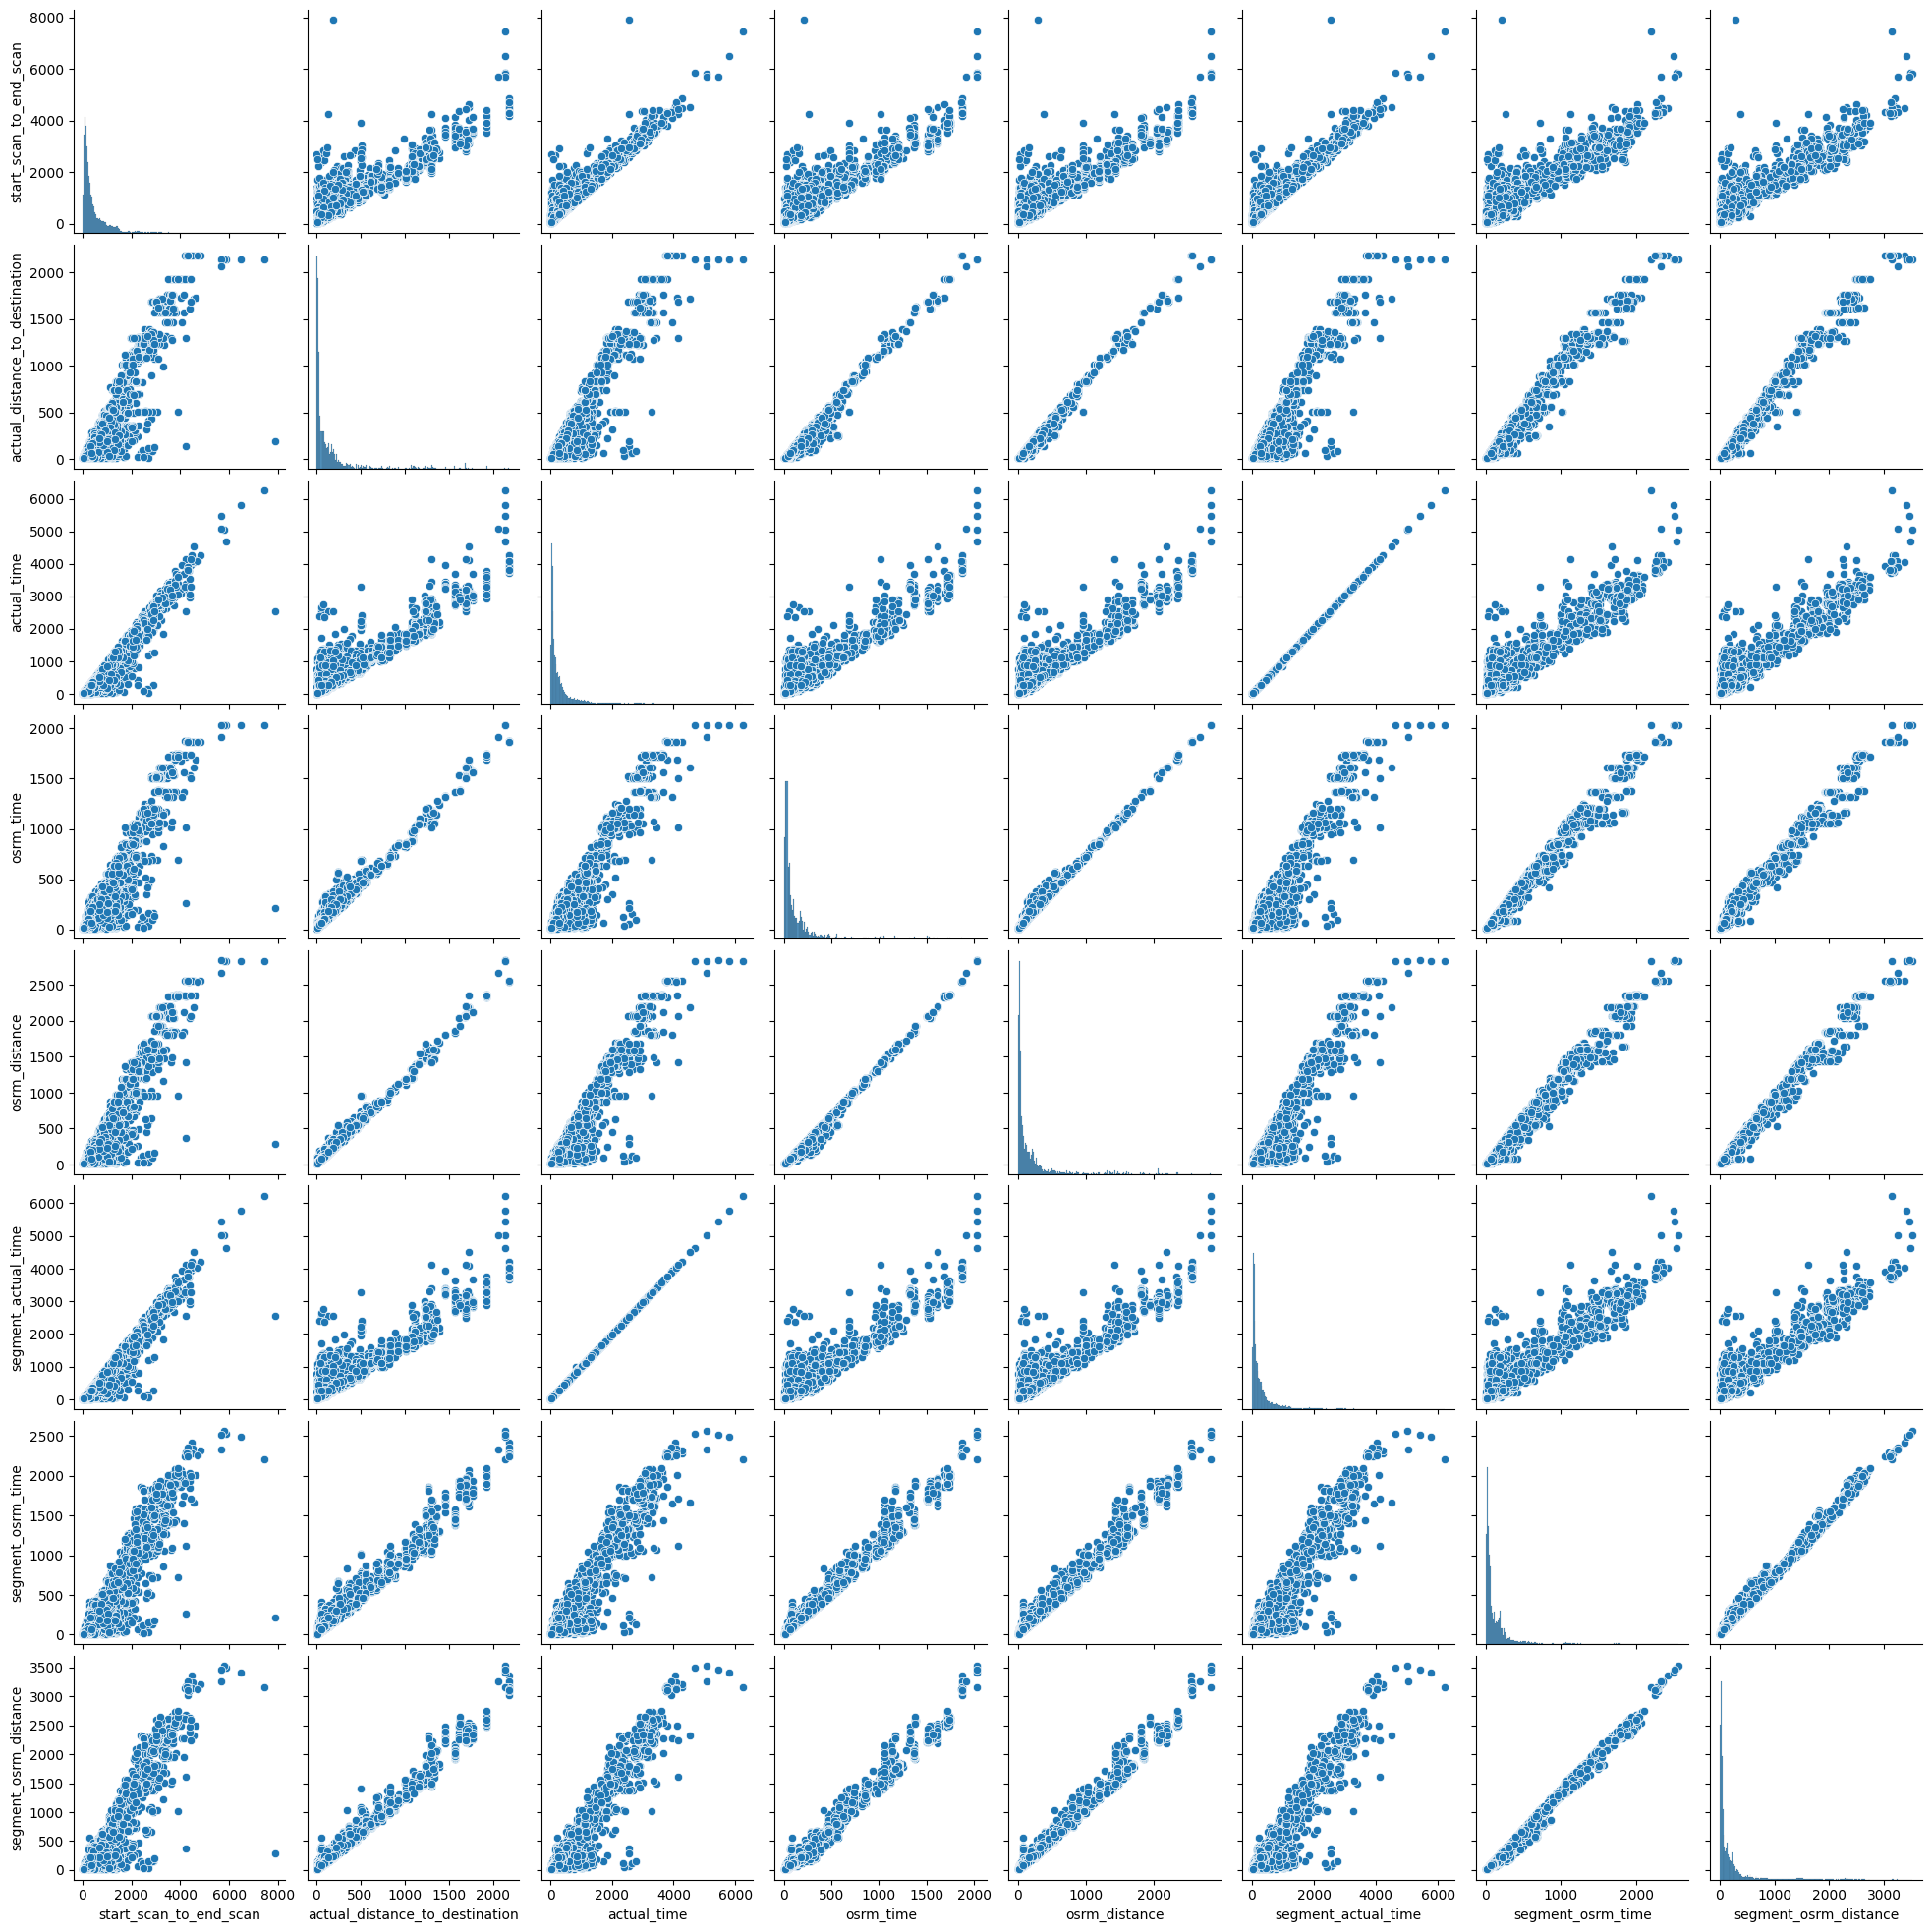

In [163]:
sns.pairplot(d_f[['start_scan_to_end_scan','actual_distance_to_destination', 'actual_time', 'osrm_time',
                  'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
                  'segment_osrm_distance']])
plt.show()

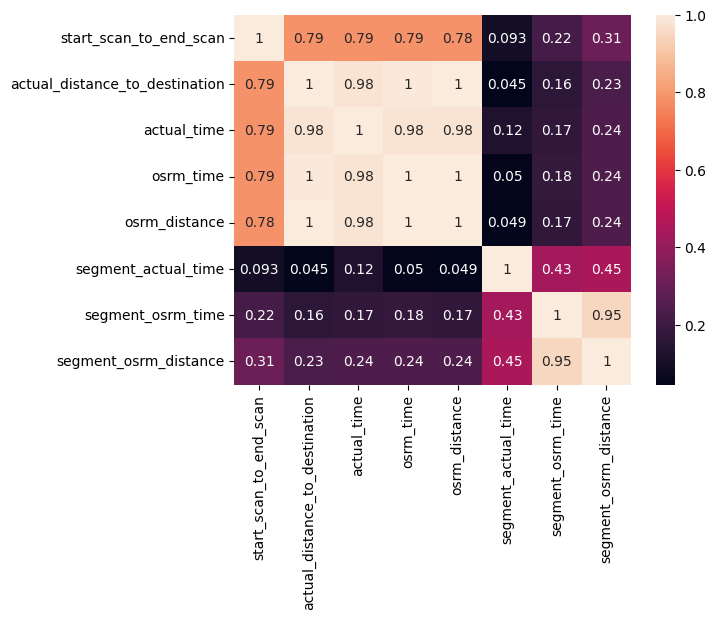

In [164]:
heat_map=sns.heatmap(df[['start_scan_to_end_scan','actual_distance_to_destination', 'actual_time', 'osrm_time',
                  'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
                  'segment_osrm_distance']].corr(), annot=True)

### **Observations:**
* As we can see OSRM time highly correlated with OSRM distance.
* Positively Correleted varaibles are following.
  1. actual_time - actual_distance_to_destination (0.98) 
  2. start_scan_to_end_scan-actual_distance_to_destination (0.98)
  3. start_scan_to_end_scan-actual_time(0.79)
  4. start_scan_to_end_scan-osrm_time(0.78)
  5. segment_osrm_time'-'segment_osrm_distance'(0.95)
  6. actual_time-'osrm_distance'(0.98)






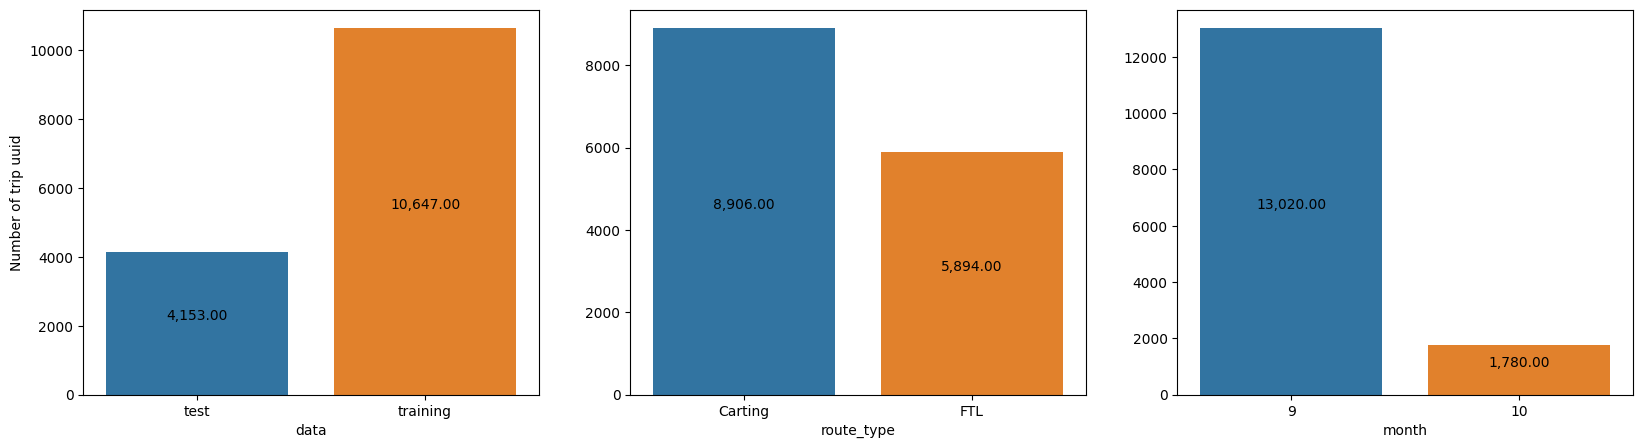

In [165]:
## Distribution of categorical variables
fig = plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
ax = sns.barplot(data=d_f.groupby('data')['trip_uuid'].nunique().reset_index(),y='trip_uuid',x='data')
for p in ax.patches:
  ax.annotate("{:,.2f}".format(p.get_height()), 
 (p.get_x() + p.get_width()/2, p.get_height()/2),ha = 'center', va = 'bottom')
plt.xlabel('data')
plt.ylabel('Number of trip uuid')
plt.subplot(1,3, 2)
ax = sns.barplot(data=d_f.groupby('route_type')['trip_uuid'].nunique().reset_index(),y='trip_uuid',x='route_type')
for p in ax.patches:
  ax.annotate("{:,.2f}".format(p.get_height()), 
 (p.get_x() + p.get_width()/2, p.get_height()/2),ha = 'center', va = 'bottom')
plt.xlabel('route_type')
plt.ylabel('')
plt.subplot(1,3, 3)
ax = sns.barplot(data=d_f.groupby('month')['trip_uuid'].nunique().reset_index(),y='trip_uuid',x='month')
for p in ax.patches:
  ax.annotate("{:,.2f}".format(p.get_height()), 
 (p.get_x() + p.get_width()/2, p.get_height()/2),ha = 'center', va = 'bottom')
plt.xlabel('month')
plt.ylabel('')
plt.show()

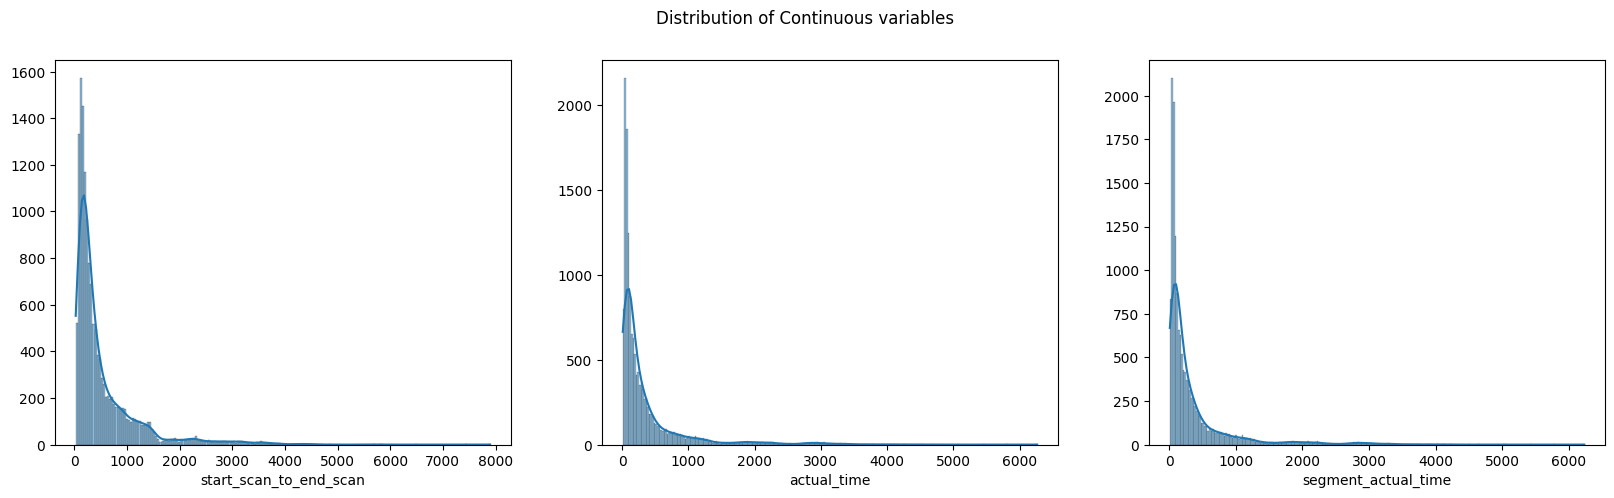

In [166]:
# Distribution of Actual time 
fig = plt.figure(figsize=(20,5))
# Distribution of start_scan_to_end_scan
plt.subplot(1, 3, 1)
ax = sns.histplot(d_f,x='start_scan_to_end_scan',kde=True)
plt.xlabel('start_scan_to_end_scan')
plt.ylabel('')
# Distribution of actual_time
plt.subplot(1,3,2)
ax = sns.histplot(d_f,x='actual_time',kde=True)
plt.xlabel('actual_time')
plt.ylabel("")
# Distribution of segment_actual_time
plt.subplot(1,3,3)
sns.histplot(d_f,x='segment_actual_time',kde=True)
plt.xlabel('segment_actual_time')
plt.ylabel("")
plt.suptitle("Distribution of Continuous variables")
plt.show()


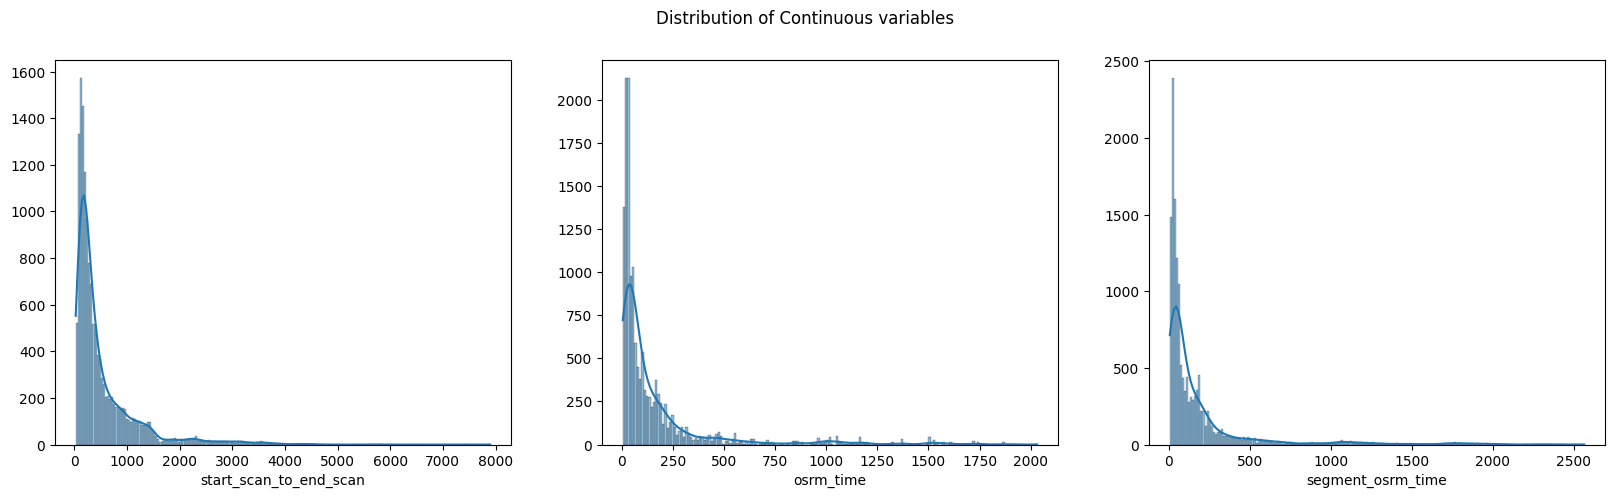

In [167]:
# Distribution of osrm time 
fig = plt.figure(figsize=(20,5))
# Distribution of start_scan_to_end_scan
plt.subplot(1, 3, 1)
ax = sns.histplot(d_f,x='start_scan_to_end_scan',kde=True)
plt.xlabel('start_scan_to_end_scan')
plt.ylabel('')
# Distribution of actual_time
plt.subplot(1,3,2)
ax = sns.histplot(d_f,x='osrm_time',kde=True)
plt.xlabel('osrm_time')
plt.ylabel("")
# Distribution of segment_actual_time
plt.subplot(1,3,3)
sns.histplot(d_f,x='segment_osrm_time',kde=True)
plt.xlabel('segment_osrm_time')
plt.ylabel("")
plt.suptitle("Distribution of Continuous variables")
plt.show()

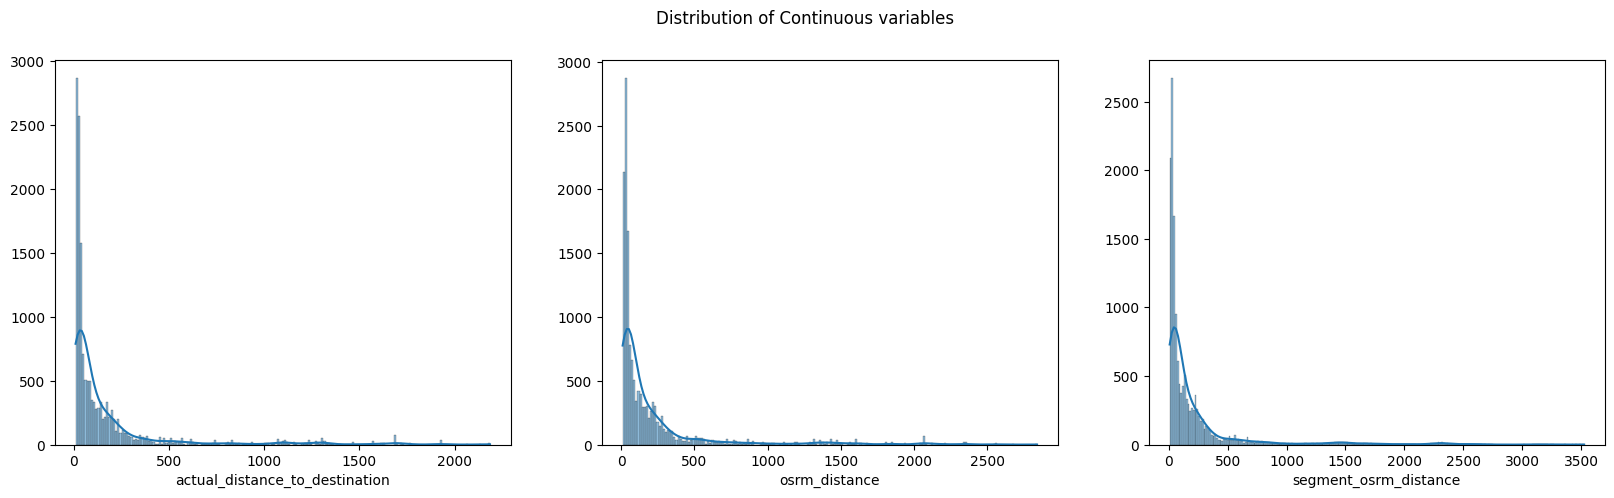

In [168]:
# Distribution of distance
fig = plt.figure(figsize=(20,5))
# Distribution of actual_distance_to_destination
plt.subplot(1, 3, 1)
ax = sns.histplot(d_f,x='actual_distance_to_destination',kde=True)
plt.xlabel('actual_distance_to_destination')
plt.ylabel('')
# Distribution of osrm_distance
plt.subplot(1,3,2)
ax = sns.histplot(d_f,x='osrm_distance',kde=True)
plt.xlabel('osrm_distance')
plt.ylabel("")
# Distribution of segment_osrm_distance
plt.subplot(1,3,3)
sns.histplot(d_f,x='segment_osrm_distance',kde=True)
plt.xlabel('segment_osrm_distance')
plt.ylabel("")
plt.suptitle("Distribution of Continuous variables")
plt.show()

### **Observations:**
* It is clear from histplot, most of the numerical data are rightly skewed.


In [169]:
# Just droping few of the columns which are not usefull for hypothesis testing.
d__f=d_f.drop(axis=1,columns=['source_name','destination_name', 'od_start_time', 'od_end_time','trip_creation_time'])

# **Hypothesis Testing**
### **CASE1: hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value:**

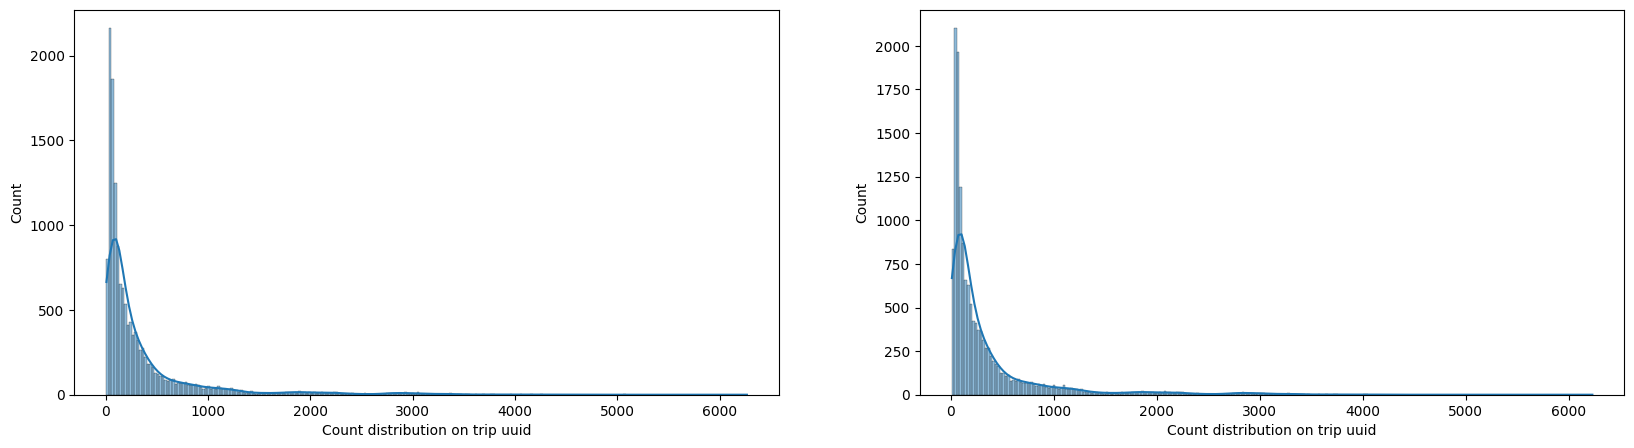

In [170]:
# visual representation for normality test
d__f_at=d__f["actual_time"].reset_index(drop=True)
d__f_sat=d__f["segment_actual_time"].reset_index(drop=True)
fig = plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.histplot(d__f_at,kde = True)
plt.xlabel('Count distribution on trip uuid',fontsize=10)
plt.subplot(1, 2, 2)
sns.histplot(d__f_sat,kde = True)
plt.xlabel('Count distribution on trip uuid',fontsize=10)
plt.show()

### **Assumptions under Student’s t-test:**
* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample are normally distributed.
* Observations in each sample have the same variance.


### **Validation of assumptions:**


In [171]:
# Validation of Assumption 1 by performing Spearman’s Rank Correlation:
# H0: The two samples are independent.
# H1: There is a dependency between the samples.
d__f_at=d__f["actual_time"].sample(14800)
d__f_sat=d__f["segment_actual_time"].sample(14800)
print("sample size d__f_at :",len(d__f_at))
print("sample size d__f_sat:",len(d__f_sat))
alpha=0.05
statistic,p_value=spearmanr(d__f_at, d__f_sat)
print("alpha:",0.05)
print("p_value:",p_value)
print("stat:",statistic)
if p_value<alpha:
  print("Reject Null Hypothesis: There is a dependency between the samples")
else:
  print('Accept Null Hypothesis: The two samples are independent')

sample size d__f_at : 14800
sample size d__f_sat: 14800
alpha: 0.05
p_value: 0.1409598423786
stat: -0.012102202720226517
Accept Null Hypothesis: The two samples are independent


In [172]:
#  Validation of Assumption 1 by performing Kruskal-Wallis H Test:
# H0: The distributions of all samples are equal.
# H1: The distributions of one or more samples are not equal.
d__f_at=d__f["actual_time"].sample(14800)
d__f_sat=d__f["segment_actual_time"].sample(14800)
print("sample size d__f_at :",len(d__f_at))
print("sample size d__f_sat:",len(d__f_sat))
alpha=0.05
statistic,p_value=kruskal(d__f_at, d__f_sat)
print("alpha:",0.05)
print("p_value:",p_value)
print("stat:",statistic)
if p_value<alpha:
  print("Reject Null Hypothesis: The distributions of one or more samples are not equal")
else:
  print('Accept Null Hypothesis: The distributions of all samples are equal')

sample size d__f_at : 14800
sample size d__f_sat: 14800
alpha: 0.05
p_value: 0.416662704607331
stat: 0.6597089756568684
Accept Null Hypothesis: The distributions of all samples are equal


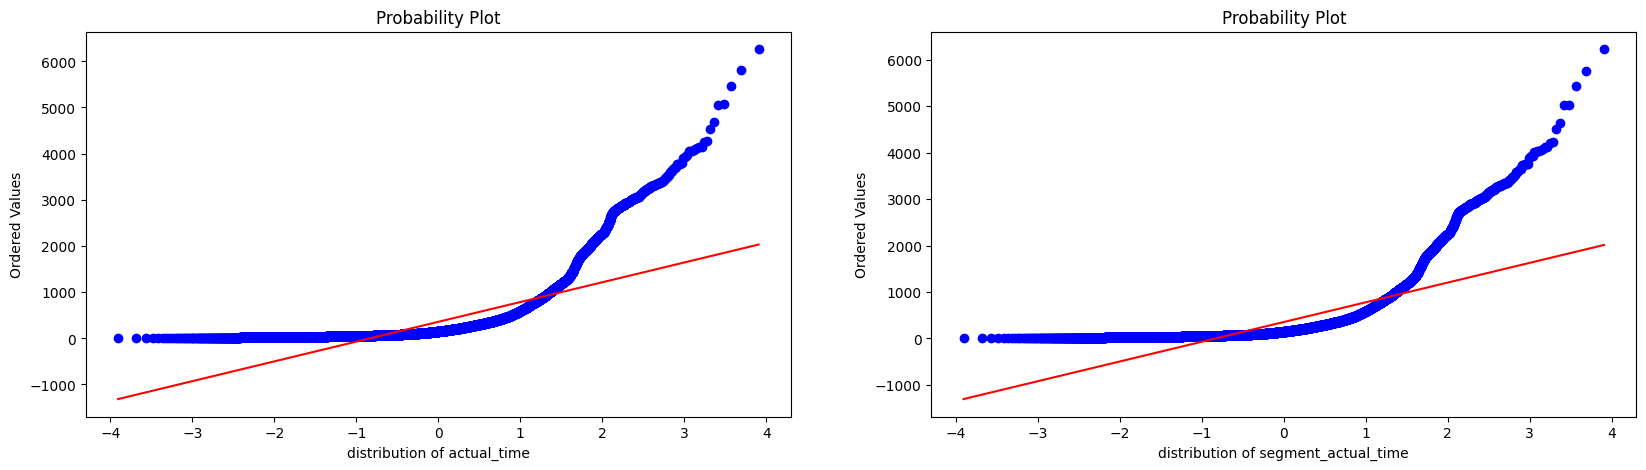

In [173]:
# Validation of Assumption 2 by performing Quantile-Quantile Plot Test:
# H0: The sample has a Gaussian distribution.
# H1: The sample does not have a Gaussian distribution.
d__f_at=d__f["actual_time"].sample(14800)
d__f_sat=d__f["segment_actual_time"].sample(14800)
fig = plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
probplot(d__f_at,dist="norm",plot=plt)
plt.xlabel('distribution of actual_time',fontsize=10)
plt.subplot(1, 2, 2)
probplot(d__f_sat,dist="norm",plot=plt)
plt.xlabel('distribution of segment_actual_time',fontsize=10)
plt.show()

Lambda value used for Transformation of actual time data: -0.1547546728203356
Lambda value used for Transformation of segment actual time data : -0.15491026962058227


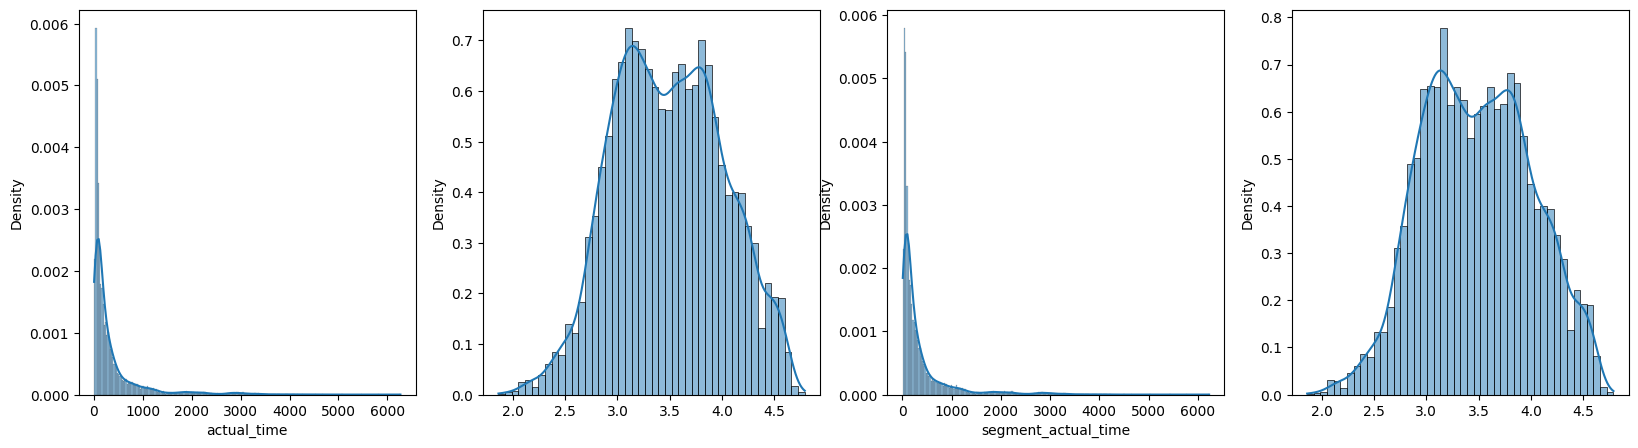

In [174]:
# Transforming data by using boxcox transformation:
original_data1=d__f_at
fitted_data1, fitted_lambda1 = boxcox(d__f_at)
original_data2=d__f_sat
fitted_data2, fitted_lambda2 = boxcox(d__f_sat)
fig = plt.figure(figsize=(20,5))
plt.subplot(1, 4, 1)
sns.histplot(original_data1, kde=True, stat="density")
plt.subplot(1, 4, 2)
sns.histplot(fitted_data1, kde=True, stat="density")
print(f"Lambda value used for Transformation of actual time data: {fitted_lambda1}")
plt.subplot(1, 4, 3)
sns.histplot(original_data2, kde=True, stat="density")
plt.subplot(1, 4, 4)
sns.histplot(fitted_data2, kde=True, stat="density")
print(f"Lambda value used for Transformation of segment actual time data : {fitted_lambda2}")
plt.show()

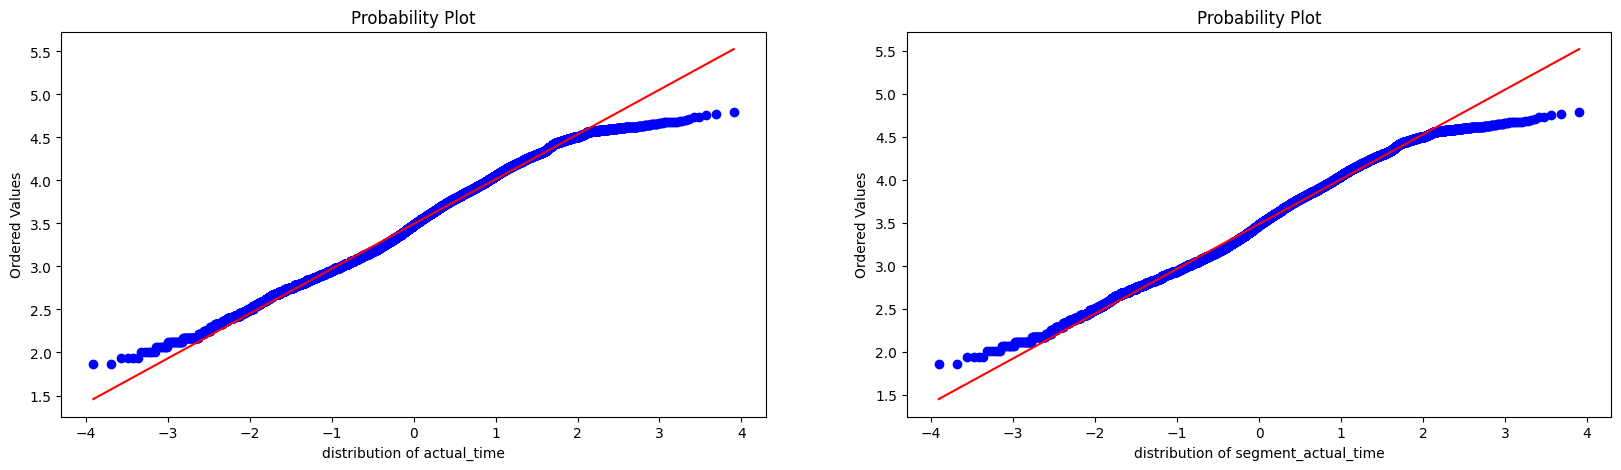

In [175]:
# Quantile-Quantile Plot after data transformation:
fig = plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
probplot(fitted_data1,dist="norm",plot=plt)
plt.xlabel('distribution of actual_time',fontsize=10)
plt.subplot(1, 2, 2)
probplot(fitted_data2,dist="norm",plot=plt)
plt.xlabel('distribution of segment_actual_time',fontsize=10)
plt.show()

In [176]:
#  Validation of Assumption 3: 
# H0:variance of the sample is same.
# Ha:variances of the sample is not same.
alpha=0.05
levene_stat,p_value=levene(d__f_at,d__f_sat)
print("alpha:",0.05)
print("p_value:",p_value)
if p_value<alpha:
  print("Reject Null Hypothesis: Variance of the input datasets is not same")
else:
  print('Accept Null Hypothesis: Variance of the input datasets is Same/Close')

alpha: 0.05
p_value: 0.6954490990469593
Accept Null Hypothesis: Variance of the input datasets is Same/Close


### **Observations:**
* As per result of Spearman’s Rank Correlation test, both the samples data are independent.
* It is clear from Kruskal-Wallis H Test, samples are identically distributed.
* Both sample data are not following normally distributed it is clear from Q-Q plot.
* After boxcox transformation, it is clear from Q-Q plot, approximately 95% (+-2 sigma) of data points are following normally distribution.   
* It is clear from levene test,Variance of the samples are same.

### **Student’s t-test:**
* Tests whether the means of two independent samples are significantly different.
### **Interpretation:**
* H0: the means of the samples are equal.

* H1: the means of the samples are unequal.

In [177]:
print(d__f["actual_time"].mean())
print(d__f["segment_actual_time"].mean())

357.2829054054054
354.0289189189189


In [178]:
# 2- Sample T-Test
d__f_at=d__f["actual_time"].sample(14800)
d__f_sat=d__f["segment_actual_time"].sample(14800)
print("sample size d__f_at :",len(d__f_at))
print("sample size d__f_sat:",len(d__f_sat))
def t_test(CL):
  alpha=1-(CL/100) # significance level(alpha)
  t_stat,p_value=ttest_ind(d__f_at,d__f_sat)
  print("Alpha:",alpha)
  print("p value:",p_value)
  print("t statistics:",t_stat)
  if p_value<alpha:
    print("Reject Null Hypothesis: The means of the samples are unequal")
  else:
    print('Accept Null Hypothesis: The means of the samples are equal')
t_test(95)

sample size d__f_at : 14800
sample size d__f_sat: 14800
Alpha: 0.050000000000000044
p value: 0.6165675968933484
t statistics: 0.5007261390408064
Accept Null Hypothesis: The means of the samples are equal


### **Observations:**
* The calculated p-value : 0.6159
* which is greater than the significance level.
* Null Hypothesis is accepted.
* The means of the actual time and segment actual times are equal.

### **CASE 2: hypothesis testing/ visual analysis between time difference between od_start_time and od_end_time &  start_scan_to_end_scan:**

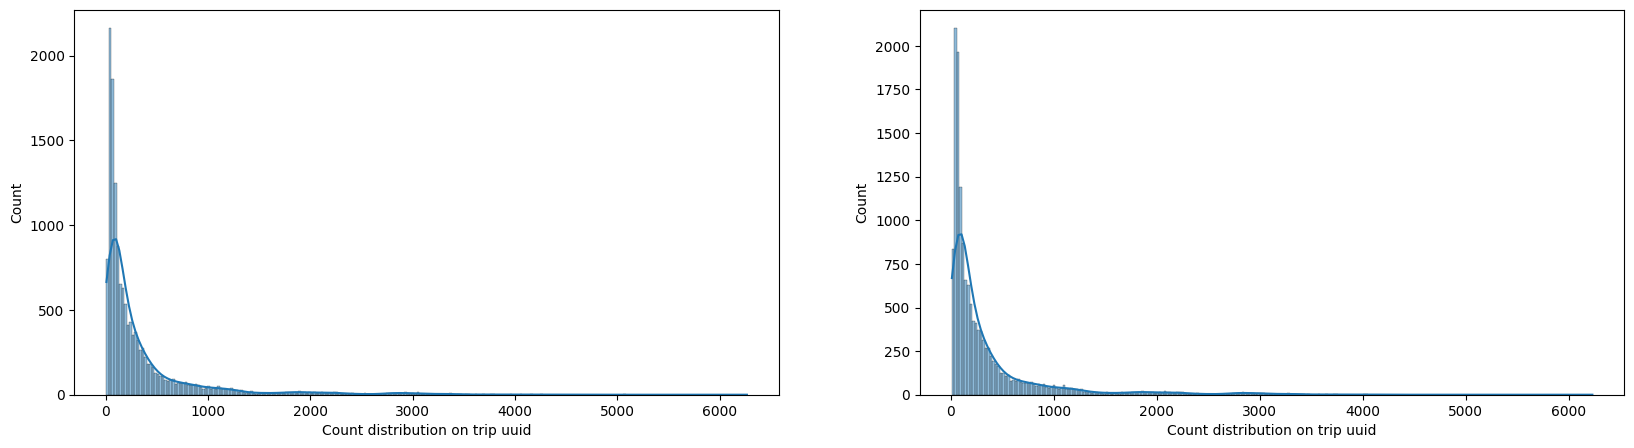

In [179]:
# visual representation for normality test
d__f_d=d__f["diff"].reset_index()
d__f_sses=d__f["start_scan_to_end_scan"].reset_index()
fig = plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.histplot(d__f_at,kde = True)
plt.xlabel('Count distribution on trip uuid',fontsize=10)
plt.subplot(1, 2, 2)
sns.histplot(d__f_sat,kde = True)
plt.xlabel('Count distribution on trip uuid',fontsize=10)
plt.show()

### **Assumptions under Student’s t-test:**
* Observations in each sample are independent and identically distributed (iid).

* Observations in each sample are normally distributed.
* Observations in each sample have the same variance.


### **Validation of assumptions:**


In [180]:
# Validation of Assumption 1 by performing Spearman’s Rank Correlation:
# H0: the two samples are independent.
# H1: there is a dependency between the samples.
d__f_d=d__f["diff"].sample(14800)
d__f_sses=d__f["start_scan_to_end_scan"].sample(14800)
print("sample size d__f_at :",len(d__f_d))
print("sample size d__f_sat:",len(d__f_sses))
alpha=0.05
statistic,p_value=spearmanr(d__f_d, d__f_sses)
print("alpha:",0.05)
print("p_value:",p_value)
print("stat:",statistic)
if p_value<alpha:
  print("Reject Null Hypothesis: There is a dependency between the samples")
else:
  print('Accept Null Hypothesis: The two samples are independent')

sample size d__f_at : 14800
sample size d__f_sat: 14800
alpha: 0.05
p_value: 0.14082983166130156
stat: 0.012106162827176612
Accept Null Hypothesis: The two samples are independent


In [181]:
#  Validation of Assumption 1 by performing Kruskal-Wallis H Test:
# H0: The distributions of all samples are equal.
# H1: The distributions of one or more samples are not equal.
d__f_d=d__f["diff"].sample(14800)
d__f_sses=d__f["start_scan_to_end_scan"].sample(14800)
print("sample size d__f_at :",len(d__f_d))
print("sample size d__f_sat:",len(d__f_sses))
alpha=0.05
statistic,p_value=kruskal(d__f_d, d__f_sses)
print("alpha:",0.05)
print("p_value:",p_value)
print("stat:",statistic)
if p_value<alpha:
  print("Reject Null Hypothesis: The distributions of one or more samples are not equal")
else:
  print('Accept Null Hypothesis: The distributions of all samples are equal')

sample size d__f_at : 14800
sample size d__f_sat: 14800
alpha: 0.05
p_value: 0.021603510774351797
stat: 5.277438274400661
Reject Null Hypothesis: The distributions of one or more samples are not equal


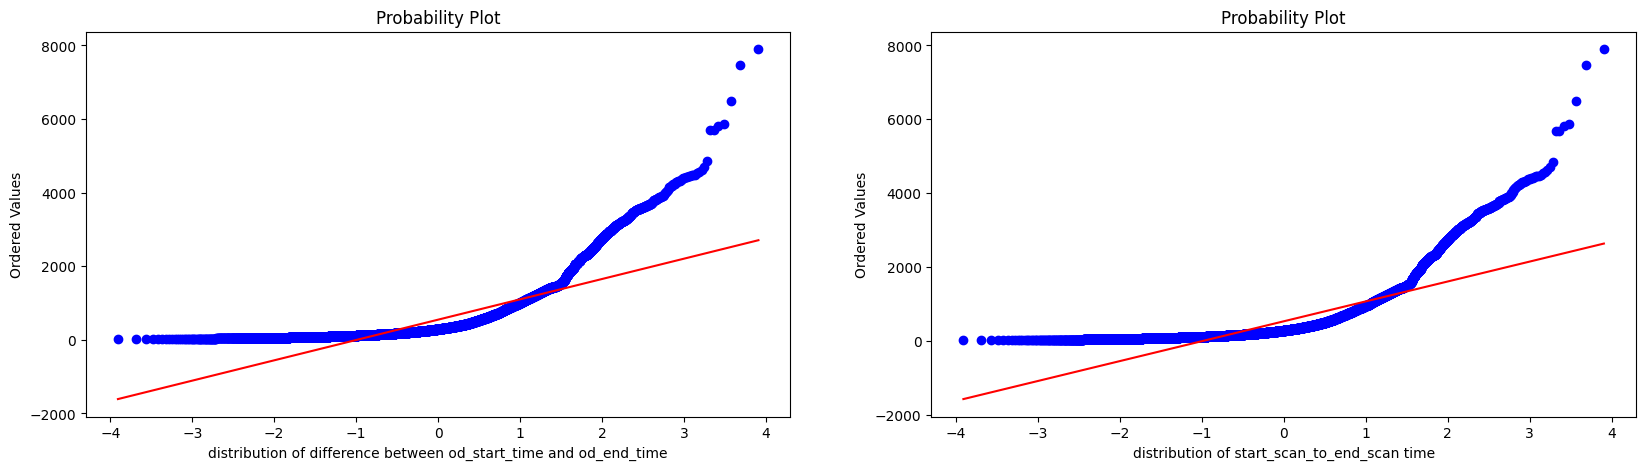

In [182]:
# Validation of Assumption 2 by performing Quantile-Quantile Plot Test:
# H0: The sample has a Gaussian distribution.
# H1: The sample does not have a Gaussian distribution.
d__f_d=d__f["diff"].sample(14800)
d__f_sses=d__f["start_scan_to_end_scan"].sample(14800)
fig = plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
probplot(d__f_d,dist="norm",plot=plt)
plt.xlabel('distribution of difference between od_start_time and od_end_time',fontsize=10)
plt.subplot(1, 2, 2)
probplot(d__f_sses,dist="norm",plot=plt)
plt.xlabel('distribution of start_scan_to_end_scan time',fontsize=10)
plt.show()

Lambda value used for Transformation of actual time data: -0.12530413647612393
Lambda value used for Transformation of segment actual time data : -0.1358531063601212


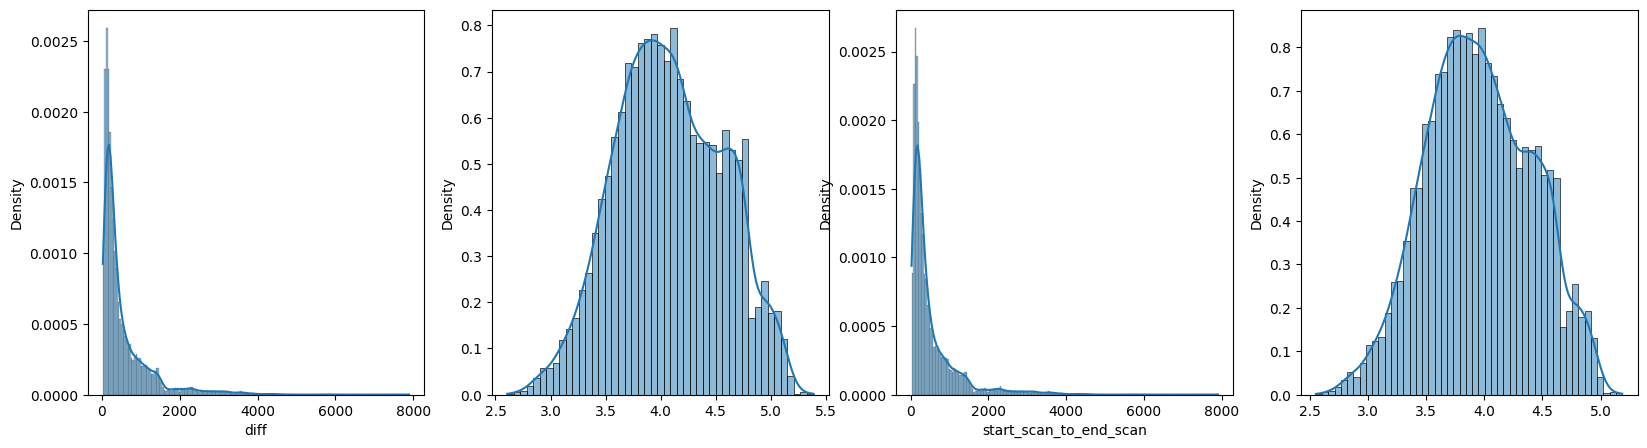

In [183]:
# Transforming data by using boxcox transformation:
original_data1=d__f_d
fitted_data1, fitted_lambda1 = boxcox(d__f_d)
original_data2=d__f_sses
fitted_data2, fitted_lambda2 = boxcox(d__f_sses)
fig = plt.figure(figsize=(20,5))
plt.subplot(1, 4, 1)
sns.histplot(original_data1, kde=True, stat="density")
plt.subplot(1, 4, 2)
sns.histplot(fitted_data1, kde=True, stat="density")
print(f"Lambda value used for Transformation of actual time data: {fitted_lambda1}")
plt.subplot(1, 4, 3)
sns.histplot(original_data2, kde=True, stat="density")
plt.subplot(1, 4, 4)
sns.histplot(fitted_data2, kde=True, stat="density")
print(f"Lambda value used for Transformation of segment actual time data : {fitted_lambda2}")
plt.show()

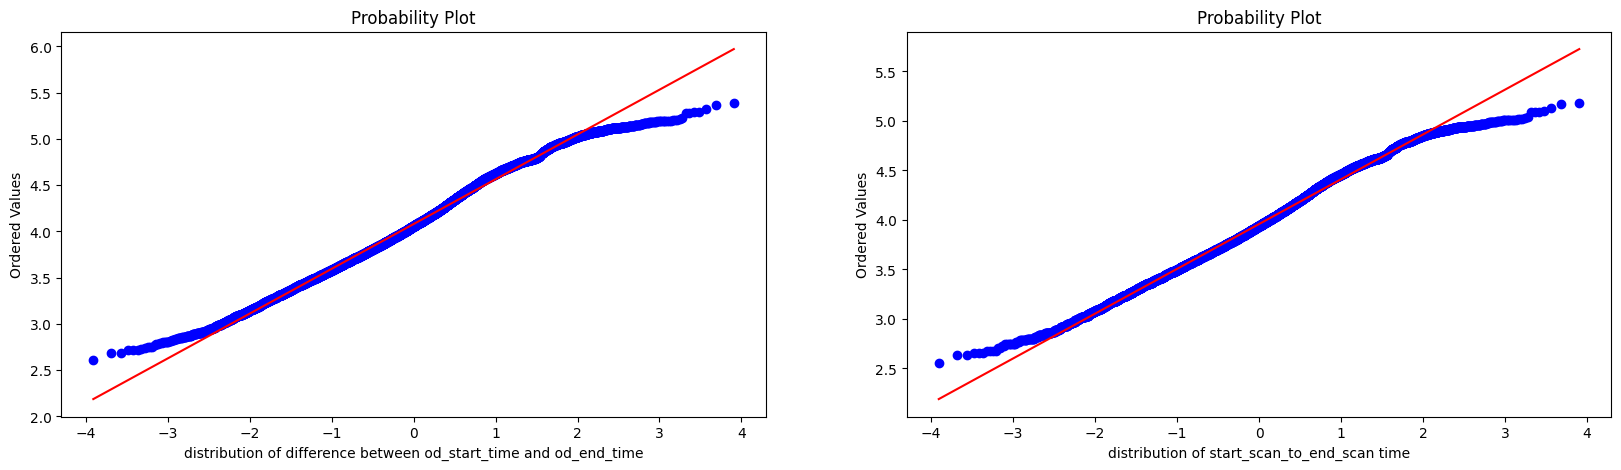

In [184]:
# Quantile-Quantile Plot after data transformation:
fig = plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
probplot(fitted_data1,dist="norm",plot=plt)
plt.xlabel('distribution of difference between od_start_time and od_end_time',fontsize=10)
plt.subplot(1, 2, 2)
probplot(fitted_data2,dist="norm",plot=plt)
plt.xlabel('distribution of start_scan_to_end_scan time',fontsize=10)
plt.show()

In [185]:
#  Validation of Assumption 3: 
# H0:variance of the sample is same.
# Ha:variances of the sample is not same.
alpha=0.05
levene_stat,p_value=levene(d__f_d,d__f_sses)
print("alpha:",0.05)
print("p_value:",p_value)
if p_value<alpha:
  print("Reject Null Hypothesis: Variance of the input datasets is not same")
else:
  print('Accept Null Hypothesis: Variance of the input datasets is Same/Close')

alpha: 0.05
p_value: 0.045220025213086545
Reject Null Hypothesis: Variance of the input datasets is not same


### **Observations:**
* As per result of Spearman’s Rank Correlation test, both the samples data are independent.
* It is clear from Kruskal-Wallis H Test, samples are not identically distributed.
* Both sample data are not following normally distributed it is clear from Q-Q plot.
* After boxcox transformation, it is clear from Q-Q plot, approximately 95% (+-2 sigma) of data points are following normally distribution.   
* It is clear from levene test, Variance of the samples are not same.

### **Student’s t-test:**
* Tests whether the means of two samples are significantly different.
### **Interpretation:**

* H0: The means of the samples are equal.

* H1: The means of the samples are unequal.

In [186]:
print(d__f["diff"].mean())
print(d__f["start_scan_to_end_scan"].mean())

547.628388248428
530.9568243243243


In [187]:
# Student’s t-test
d__f_d=d__f["diff"].sample(14800)
d__f_sses=d__f["start_scan_to_end_scan"].sample(14800)
print("sample size d__f_at :",len(d__f_d))
print("sample size d__f_sat:",len(d__f_sses))
def t_test(CL):
  alpha=1-(CL/100) # significance level(alpha)
  t_stat,p_value=ttest_ind(d__f_d,d__f_sses,alternative='greater')
  print("Alpha:",alpha)
  print("p value:",p_value)
  print("t statistics:",t_stat)
  if p_value<alpha:
    print("Reject Null Hypothesis: The means of the samples are unequal")
  else:
    print('Accept Null Hypothesis: The means of the samples are equal')
t_test(95)

sample size d__f_at : 14800
sample size d__f_sat: 14800
Alpha: 0.050000000000000044
p value: 0.015359490228817607
t statistics: 2.160797513574266
Reject Null Hypothesis: The means of the samples are unequal


### **Observations:**
* The calculated p-value : 0.01535
* Which is lessar than the significance level.
* Null Hypothesis is Rejected.
* The mean of the difference between order start time to order end time & start scan to end scan are higher.

# **CASE 3: hypothesis testing/ visual analysis between actual_time and OSRM time:**

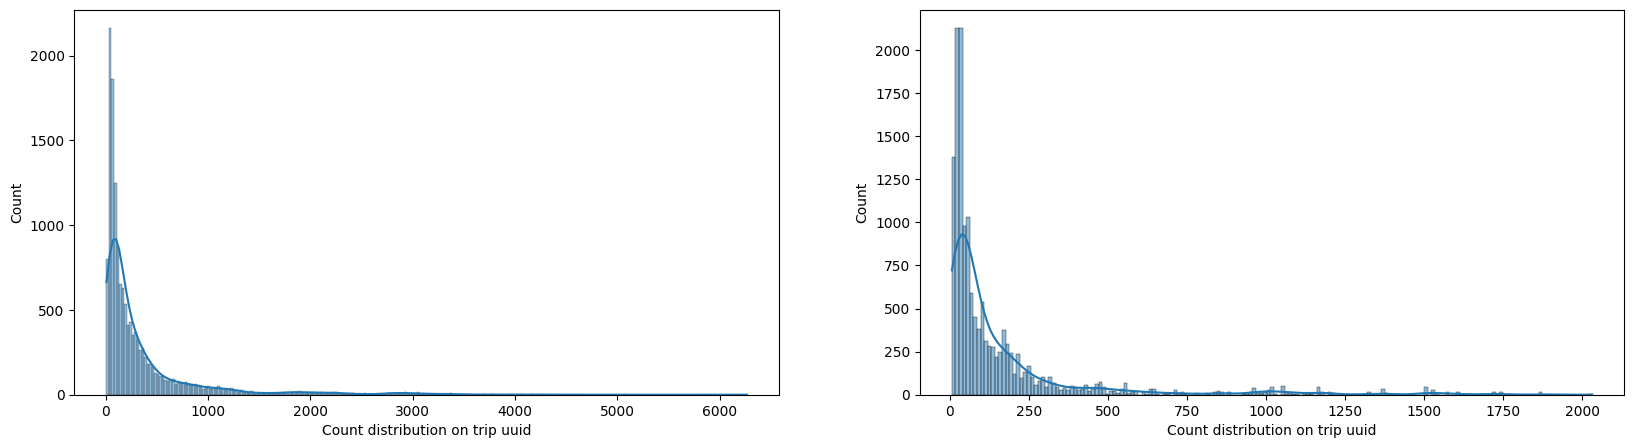

In [188]:
# visual representation for normality test
d__f_at=d__f["actual_time"].reset_index(drop=True)
d__f_ot=d__f["osrm_time"].reset_index(drop=True)
fig = plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.histplot(d__f_at,kde = True)
plt.xlabel('Count distribution on trip uuid',fontsize=10)
plt.subplot(1, 2, 2)
sns.histplot(d__f_ot,kde = True)
plt.xlabel('Count distribution on trip uuid',fontsize=10)
plt.show()

### **Assumptions under Student’s t-test:**
* Observations in each sample are independent and identically distributed (iid).

* Observations in each sample are normally distributed.
* Observations in each sample have the same variance.




### **Validation of assumptions:**


In [189]:
# Validation of Assumption 1 by performing Spearman’s Rank Correlation:
# H0: the two samples are independent.
# H1: there is a dependency between the samples.
d__f_at=d__f["actual_time"].sample(14800)
d__f_ot=d__f["osrm_time"].sample(14800)
print("sample size d__f_at :",len(d__f_at))
print("sample size d__f_sat:",len(d__f_ot))
alpha=0.05
statistic,p_value=spearmanr(d__f_at, d__f_ot)
print("alpha:",0.05)
print("p_value:",p_value)
print("stat:",statistic)
if p_value<alpha:
  print("Reject Null Hypothesis: There is a dependency between the samples")
else:
  print('Accept Null Hypothesis: The two samples are independent')

sample size d__f_at : 14800
sample size d__f_sat: 14800
alpha: 0.05
p_value: 0.9878611122734979
stat: 0.0001250723793130502
Accept Null Hypothesis: The two samples are independent


In [221]:
#  Validation of Assumption 1 by performing Kruskal-Wallis H Test:
# H0: The distributions of all samples are equal.
# H1: The distributions of one or more samples are not equal.
d__f_at=d__f["actual_time"].sample(14800)
d__f_ot=d__f["osrm_time"].sample(14800)
print("sample size d__f_at :",len(d__f_at))
print("sample size d__f_sat:",len(d__f_ot))
alpha=0.05
statistic,p_value=kruskal(d__f_at, d__f_ot)
print("alpha:",0.05)
print("p_value:",p_value)
print("stat:",statistic)
if p_value<alpha:
  print("Reject Null Hypothesis: The distributions of one or more samples are not equal")
else:
  print('Accept Null Hypothesis: The distributions of all samples are equal')

sample size d__f_at : 14800
sample size d__f_sat: 14800
alpha: 0.05
p_value: 0.0
stat: 3400.115860061145
Reject Null Hypothesis: The distributions of one or more samples are not equal


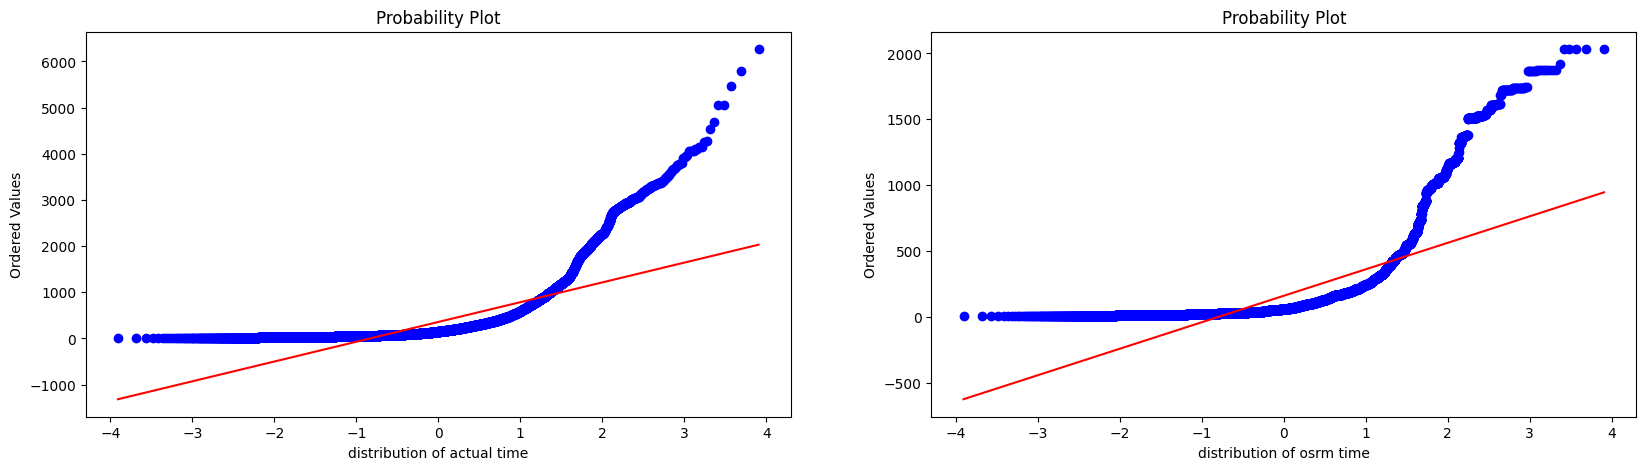

In [191]:
# Validation of Assumption 2 by performing Quantile-Quantile Plot Test:
# H0: The sample has a Gaussian distribution.
# H1: The sample does not have a Gaussian distribution.
d__f_at=d__f["actual_time"].sample(14800)
d__f_ot=d__f["osrm_time"].sample(14800)
fig = plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
probplot(d__f_at,dist="norm",plot=plt)
plt.xlabel('distribution of actual time',fontsize=10)
plt.subplot(1, 2, 2)
probplot(d__f_ot,dist="norm",plot=plt)
plt.xlabel('distribution of osrm time',fontsize=10)
plt.show()

Lambda value used for Transformation of actual time data: -0.15475467353456
Lambda value used for Transformation of segment actual time data : -0.21319196584205294


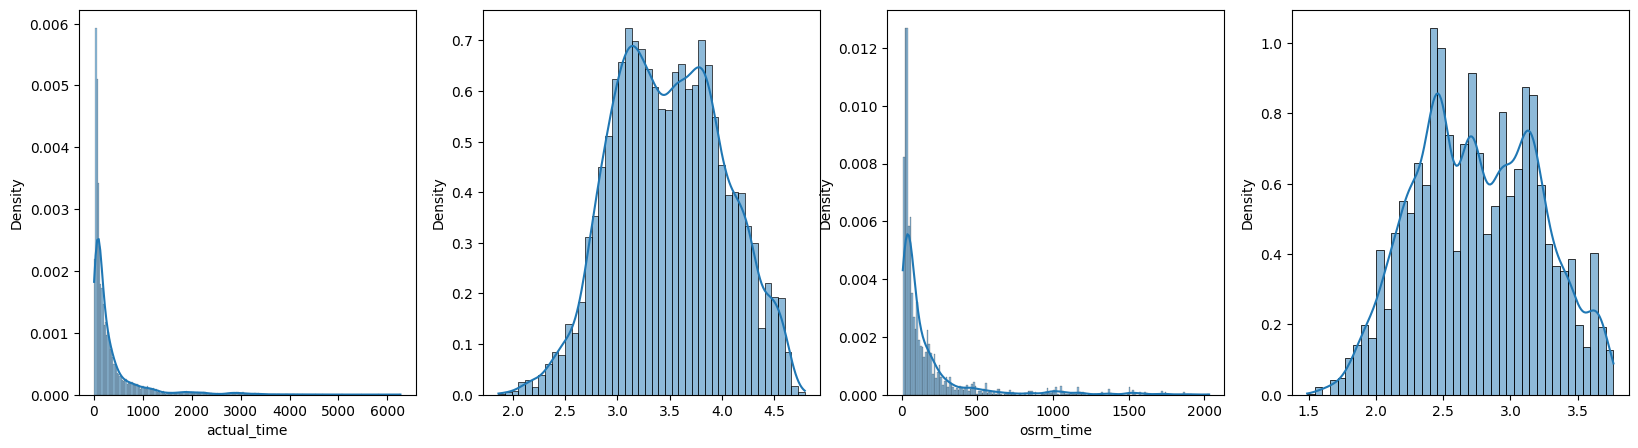

In [192]:
# Transforming data by using boxcox transformation:
original_data1=d__f_at
fitted_data1, fitted_lambda1 = boxcox(d__f_at)
original_data2=d__f_ot
fitted_data2, fitted_lambda2 = boxcox(d__f_ot)
fig = plt.figure(figsize=(20,5))
plt.subplot(1, 4, 1)
sns.histplot(original_data1, kde=True, stat="density")
plt.subplot(1, 4, 2)
sns.histplot(fitted_data1, kde=True, stat="density")
print(f"Lambda value used for Transformation of actual time data: {fitted_lambda1}")
plt.subplot(1, 4, 3)
sns.histplot(original_data2, kde=True, stat="density")
plt.subplot(1, 4, 4)
sns.histplot(fitted_data2, kde=True, stat="density")
print(f"Lambda value used for Transformation of segment actual time data : {fitted_lambda2}")
plt.show()

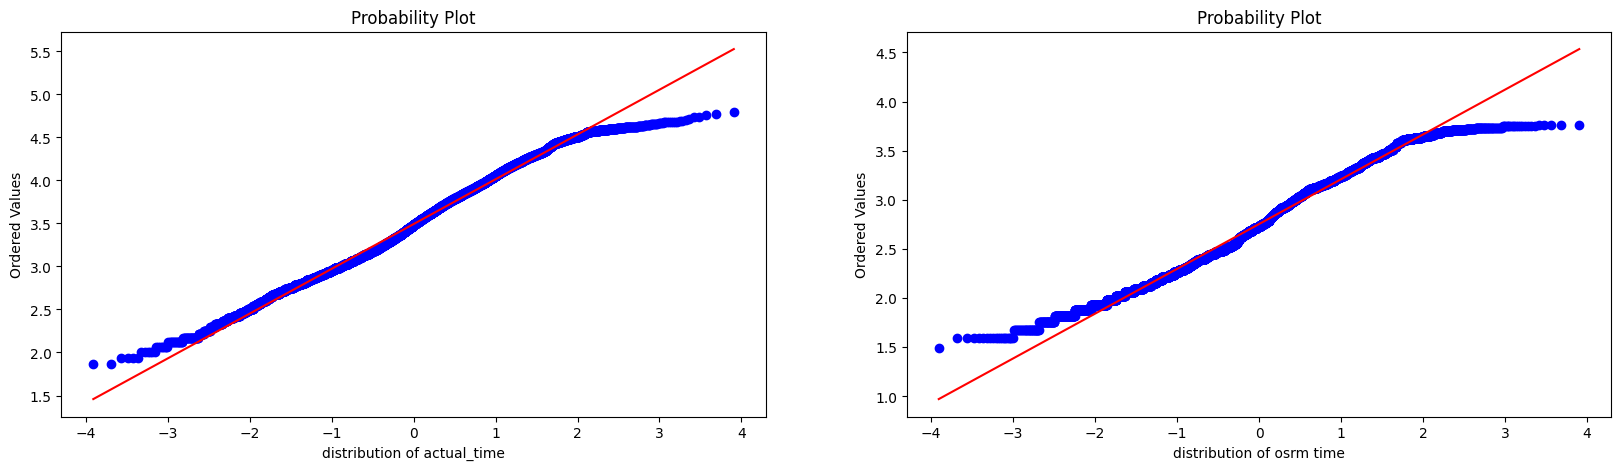

In [193]:
# Quantile-Quantile Plot after data transformation:
fig = plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
probplot(fitted_data1,dist="norm",plot=plt)
plt.xlabel('distribution of actual_time',fontsize=10)
plt.subplot(1, 2, 2)
probplot(fitted_data2,dist="norm",plot=plt)
plt.xlabel('distribution of osrm time',fontsize=10)
plt.show()

In [194]:
#  Validation of Assumption 3: 
# H0:variance of the sample is same.
# Ha:variances of the sample is not same.
alpha=0.05
levene_stat,p_value=levene(d__f_at,d__f_ot)
print("alpha:",0.05)
print("p_value:",p_value)
if p_value<alpha:
  print("Reject Null Hypothesis: Variance of the input datasets is not same")
else:
  print('Accept Null Hypothesis: Variance of the input datasets is Same/Close')

alpha: 0.05
p_value: 3.470800813899771e-220
Reject Null Hypothesis: Variance of the input datasets is not same


### **Observations:**
* As per result of Spearman’s Rank Correlation test, both the samples data are independent.
* It is clear from Kruskal-Wallis H Test, samples are not identically distributed.
* Both sample data are not following normal distribution,it is clear from Q-Q plot.
* After boxcox transformation, it is clear from Q-Q plot, approximately 95% (+-2 sigma) of data points are following normally distribution.   
* From levene test it is clear that,Variance of the samples are not same.

### **Student’s t-test:**
* Tests whether the means of two samples are significantly different.
### **Interpretation:**

* H0: The means of the samples are equal.

* H1: The means of the samples are unequal.

In [195]:
print(d__f["actual_time"].mean())
print(d__f["osrm_time"].mean())

357.2829054054054
161.47885135135135


In [196]:
# Student’s t-test
d__f_at=d__f["actual_time"]
d__f_ot=d__f["osrm_time"]
print("sample size d__f_at :",len(d__f_at))
print("sample size d__f_sat:",len(d__f_ot))
def t_test(CL):
  alpha=1-(CL/100) # significance level(alpha)
  t_stat,p_value=ttest_ind(d__f_at,d__f_ot,alternative='greater')
  print("Alpha:",alpha)
  print("p value:",p_value)
  print("t statistics:",t_stat)
  if p_value<alpha:
    print("Reject Null Hypothesis: The means of the samples are unequal")
  else:
    print('Accept Null Hypothesis: The means of the samples are equal')
t_test(95)

sample size d__f_at : 14800
sample size d__f_sat: 14800
Alpha: 0.050000000000000044
p value: 0.0
t statistics: 38.18753943384186
Reject Null Hypothesis: The means of the samples are unequal


### **Observations:**
* The calculated p-value : 0.0
* Which is lessar than the significance level.
* Null Hypothesis is Rejected.
* The means of the actual time is significantly greater than  osrm time.

### **CASE 4: hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value** 

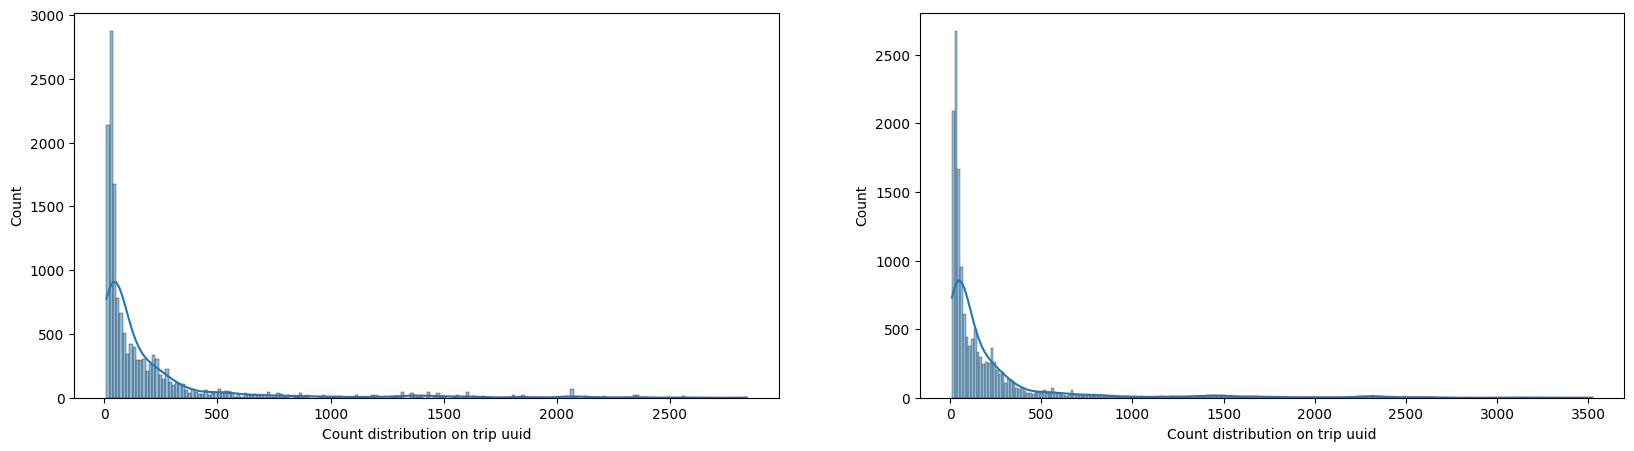

In [197]:
# visual representation for normality test
d__f_od=d__f["osrm_distance"].reset_index(drop=True)
d__f_sod=d__f["segment_osrm_distance"].reset_index(drop=True)
fig = plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.histplot(d__f_od,kde = True)
plt.xlabel('Count distribution on trip uuid',fontsize=10)
plt.subplot(1, 2, 2)
sns.histplot(d__f_sod,kde = True)
plt.xlabel('Count distribution on trip uuid',fontsize=10)
plt.show()

### **Assumptions under Student’s t-test:**
* Observations in each sample are independent and identically distributed (iid).

* Observations in each sample are normally distributed.
* Observations in each sample have the same variance.




### **Validation of assumptions:**


In [198]:
# Validation of Assumption 1 by performing Spearman’s Rank Correlation:
# H0: the two samples are independent.
# H1: there is a dependency between the samples.
d__f_od=d__f["osrm_distance"].sample(14800)
d__f_sod=d__f["segment_osrm_distance"].sample(14800)
print("sample size d__f_at :",len(d__f_od))
print("sample size d__f_sat:",len(d__f_sod))
alpha=0.05
statistic,p_value=spearmanr(d__f_od, d__f_sod)
print("alpha:",0.05)
print("p_value:",p_value)
print("stat:",statistic)
if p_value<alpha:
  print("Reject Null Hypothesis: There is a dependency between the samples")
else:
  print('Accept Null Hypothesis: The two samples are independent')

sample size d__f_at : 14800
sample size d__f_sat: 14800
alpha: 0.05
p_value: 0.9482026037271275
stat: -0.0005340464768059765
Accept Null Hypothesis: The two samples are independent


In [199]:
#  Validation of Assumption 1 by performing Kruskal-Wallis H Test:
# H0: The distributions of all samples are equal.
# H1: The distributions of one or more samples are not equal.
d__f_od=d__f["osrm_distance"].sample(14800)
d__f_sod=d__f["segment_osrm_distance"].sample(14800)
print("sample size d__f_at :",len(d__f_od))
print("sample size d__f_sat:",len(d__f_sod))
alpha=0.05
statistic,p_value=kruskal(d__f_od, d__f_sod)
print("alpha:",0.05)
print("p_value:",p_value)
print("stat:",statistic)
if p_value<alpha:
  print("Reject Null Hypothesis: The distributions of one or more samples are not equal")
else:
  print('Accept Null Hypothesis: The distributions of all samples are equal')

sample size d__f_at : 14800
sample size d__f_sat: 14800
alpha: 0.05
p_value: 9.74541771905497e-07
stat: 23.977775085670274
Reject Null Hypothesis: The distributions of one or more samples are not equal


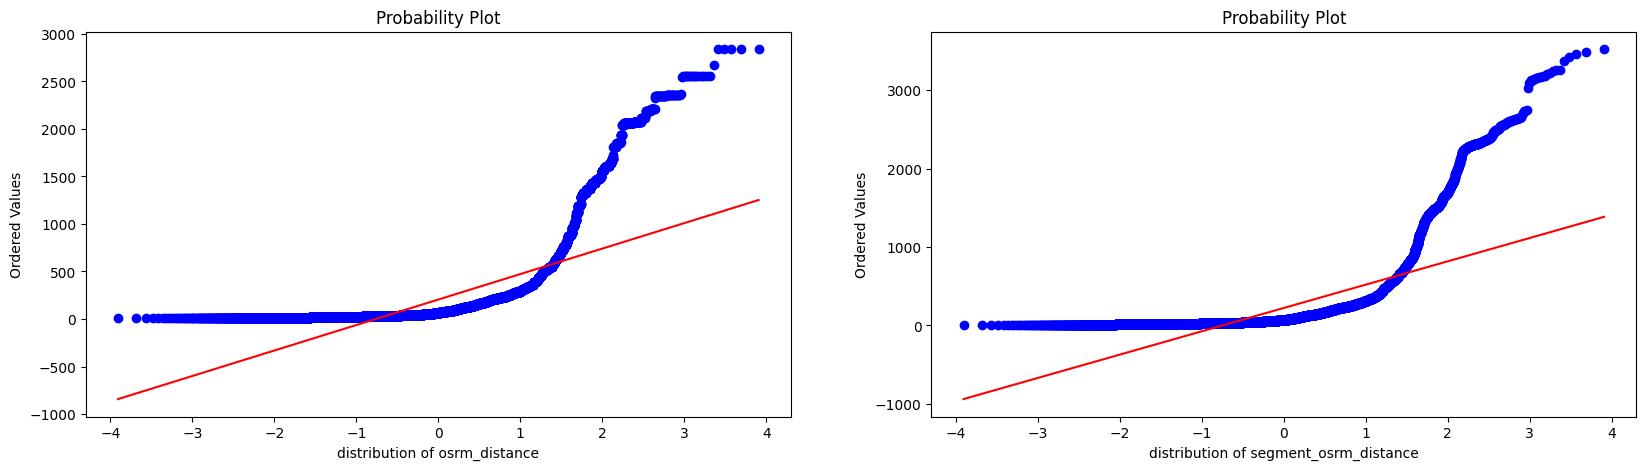

In [200]:
# Validation of Assumption 2 by performing Quantile-Quantile Plot Test:
# H0: The sample has a Gaussian distribution.
# H1: The sample does not have a Gaussian distribution.
d__f_od=d__f["osrm_distance"].sample(14800)
d__f_sod=d__f["segment_osrm_distance"].sample(14800)
fig = plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
probplot(d__f_od,dist="norm",plot=plt)
plt.xlabel('distribution of osrm_distance',fontsize=10)
plt.subplot(1, 2, 2)
probplot(d__f_sod,dist="norm",plot=plt)
plt.xlabel('distribution of segment_osrm_distance',fontsize=10)
plt.show()

Lambda value used for Transformation of actual time data: -0.22688048897680974
Lambda value used for Transformation of segment actual time data : -0.2131924334750331


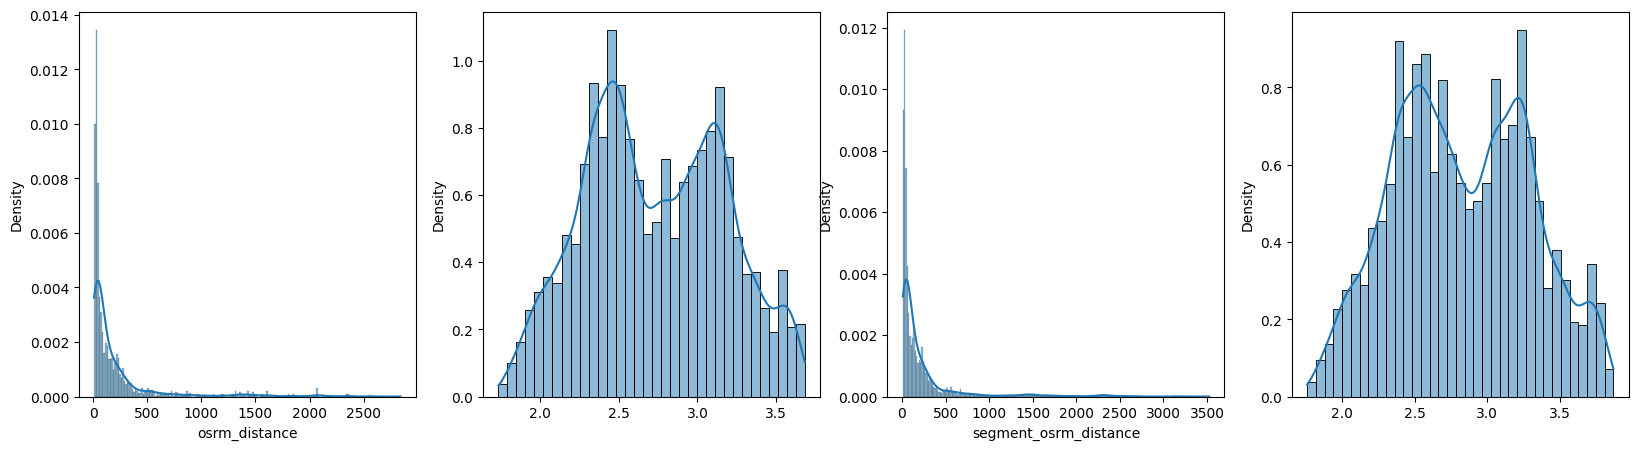

In [201]:
# Transforming data by using boxcox transformation:
original_data1=d__f_od
fitted_data1, fitted_lambda1 = boxcox(d__f_od)
original_data2=d__f_sod
fitted_data2, fitted_lambda2 = boxcox(d__f_sod)
fig = plt.figure(figsize=(20,5))
plt.subplot(1, 4, 1)
sns.histplot(original_data1, kde=True, stat="density")
plt.subplot(1, 4, 2)
sns.histplot(fitted_data1, kde=True, stat="density")
print(f"Lambda value used for Transformation of actual time data: {fitted_lambda1}")
plt.subplot(1, 4, 3)
sns.histplot(original_data2, kde=True, stat="density")
plt.subplot(1, 4, 4)
sns.histplot(fitted_data2, kde=True, stat="density")
print(f"Lambda value used for Transformation of segment actual time data : {fitted_lambda2}")
plt.show()

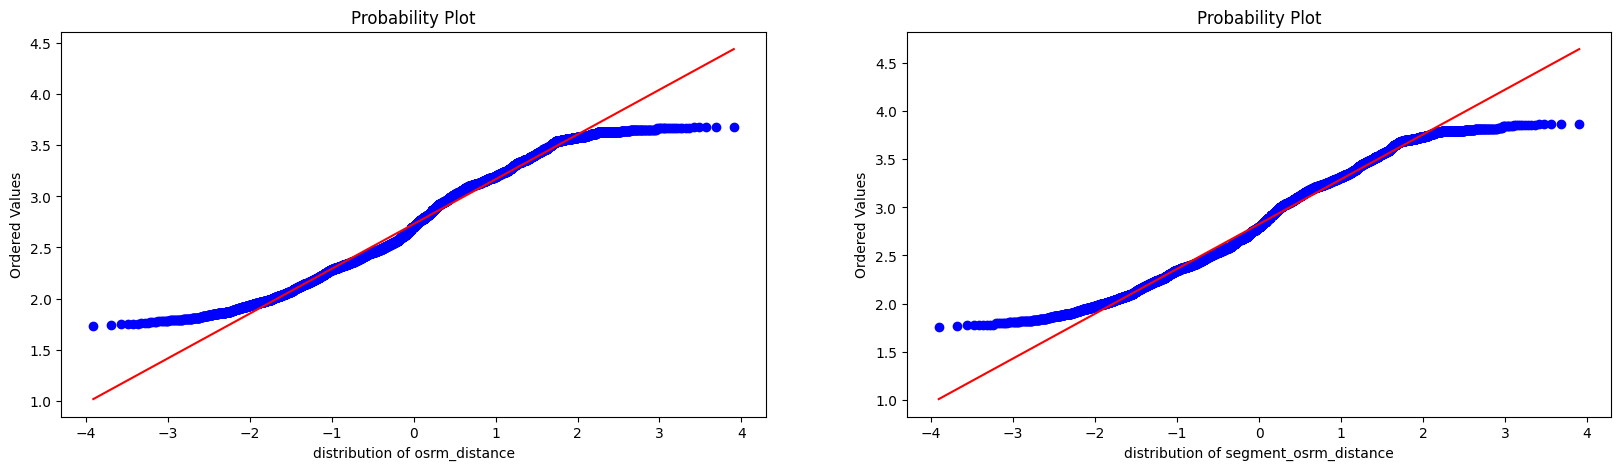

In [202]:
# Quantile-Quantile Plot after data transformation:
fig = plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
probplot(fitted_data1,dist="norm",plot=plt)
plt.xlabel('distribution of osrm_distance',fontsize=10)
plt.subplot(1, 2, 2)
probplot(fitted_data2,dist="norm",plot=plt)
plt.xlabel('distribution of segment_osrm_distance',fontsize=10)
plt.show()

In [203]:
#  Validation of Assumption 3: 
# H0:variance of the sample is same.
# Ha:variances of the sample is not same.
alpha=0.05
levene_stat,p_value=levene(d__f_od,d__f_sod)
print("alpha:",0.05)
print("p_value:",p_value)
if p_value<alpha:
  print("Reject Null Hypothesis: Variance of the input datasets is not same")
else:
  print('Accept Null Hypothesis: Variance of the input datasets is Same/Close')

alpha: 0.05
p_value: 0.0002107523278057755
Reject Null Hypothesis: Variance of the input datasets is not same


### **Observations:**
* As per result of Spearman’s Rank Correlation test, both the samples data are independent.
* It is clear from Kruskal-Wallis H Test, samples are not identically distributed.
* Both sample data are not following normal distribution,it is clear from Q-Q plot.
* After boxcox transformation, it is clear from Q-Q plot, approximately 68% (+-1 sigma) of data points are following normally distribution.   
* From levene test it is clear that,Variance of the samples are not same.

### **Student’s t-test:**
* Tests whether the means of two samples are significantly different.
### **Interpretation:**

* H0: The means of the samples are equal.

* H1: The means of the samples are unequal.

In [204]:
print(d__f["osrm_distance"].mean())
print(d__f["segment_osrm_distance"].mean())

204.4722385472973
223.34120322297298


In [220]:
# Paired Student’s t-test
d__f_od=d__f["osrm_distance"].sample(14800)
d__f_sod=d__f["segment_osrm_distance"].sample(14800)
print("sample size d__f_at :",len(d__f_od))
print("sample size d__f_sat:",len(d__f_sod))
def t_test(CL):
  alpha=1-(CL/100) # significance level(alpha)
  t_stat,p_value=ttest_ind(d__f_od,d__f_sod,alternative='less')
  print("Alpha:",alpha)
  print("p value:",p_value)
  print("t statistics:",t_stat)
  if p_value<alpha:
    print("Reject Null Hypothesis: The means of the samples are unequal")
  else:
    print('Accept Null Hypothesis: The means of the samples are equal')
t_test(95)

sample size d__f_at : 14800
sample size d__f_sat: 14800
Alpha: 0.050000000000000044
p value: 1.9358793633779425e-05
t statistics: -4.115625507230605
Reject Null Hypothesis: The means of the samples are unequal


### **Observations:**
* The calculated p-value : 1.9358793633779425e-05
* Which is lessar than the significance level.
* Null Hypothesis is Rejected.
* The means of the osrm distance lesser than the segment osrm distance.

### **CASE 5: hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value**

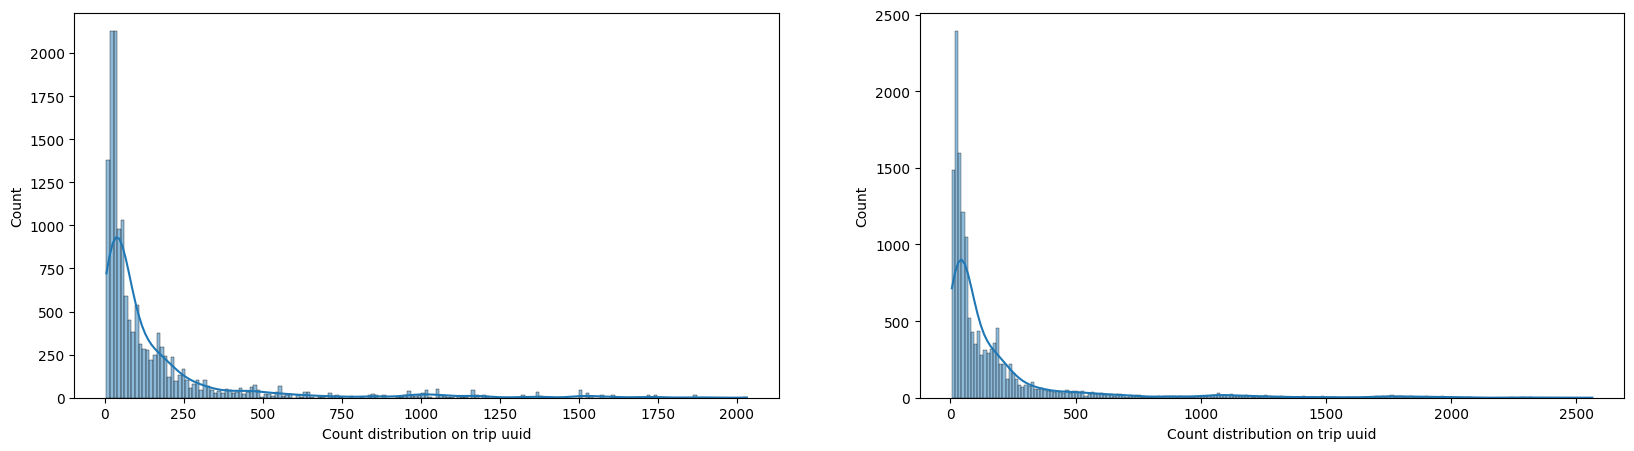

In [206]:
# visual representation for normality test
d__f_ot=d__f["osrm_time"].reset_index(drop=True)
d__f_sot=d__f["segment_osrm_time"].reset_index(drop=True)
fig = plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.histplot(d__f_ot,kde = True)
plt.xlabel('Count distribution on trip uuid',fontsize=10)
plt.subplot(1, 2, 2)
sns.histplot(d__f_sot,kde = True)
plt.xlabel('Count distribution on trip uuid',fontsize=10)
plt.show()

### **Assumptions under Student’s t-test:**
* Observations in each sample are independent and identically distributed (iid).

* Observations in each sample are normally distributed.
* Observations in each sample have the same variance.




### **Validation of assumptions:**


In [207]:
# Validation of Assumption 1 by performing Spearman’s Rank Correlation:
# H0: the two samples are independent.
# H1: there is a dependency between the samples.
d__f_ot=d__f["osrm_time"].sample(14800)
d__f_sot=d__f["segment_osrm_time"].sample(14800)
print("sample size d__f_at :",len(d__f_ot))
print("sample size d__f_sat:",len(d__f_sot))
alpha=0.05
statistic,p_value=spearmanr(d__f_ot, d__f_sot)
print("alpha:",0.05)
print("p_value:",p_value)
print("stat:",statistic)
if p_value<alpha:
  print("Reject Null Hypothesis: There is a dependency between the samples")
else:
  print('Accept Null Hypothesis: The two samples are independent')

sample size d__f_at : 14800
sample size d__f_sat: 14800
alpha: 0.05
p_value: 0.47007907795218995
stat: 0.0059381328596403715
Accept Null Hypothesis: The two samples are independent


In [208]:
#  Validation of Assumption 1 by performing Kruskal-Wallis H Test:
# H0: The distributions of all samples are equal.
# H1: The distributions of one or more samples are not equal.
d__f_ot=d__f["osrm_time"].sample(14800)
d__f_sot=d__f["segment_osrm_time"].sample(14800)
print("sample size d__f_at :",len(d__f_ot))
print("sample size d__f_sat:",len(d__f_sot))
alpha=0.05
statistic,p_value=kruskal(d__f_ot, d__f_sot)
print("alpha:",0.05)
print("p_value:",p_value)
print("stat:",statistic)
if p_value<alpha:
  print("Reject Null Hypothesis: The distributions of one or more samples are not equal")
else:
  print('Accept Null Hypothesis: The distributions of all samples are equal')

sample size d__f_at : 14800
sample size d__f_sat: 14800
alpha: 0.05
p_value: 2.388694733325058e-08
stat: 31.14975528566642
Reject Null Hypothesis: The distributions of one or more samples are not equal


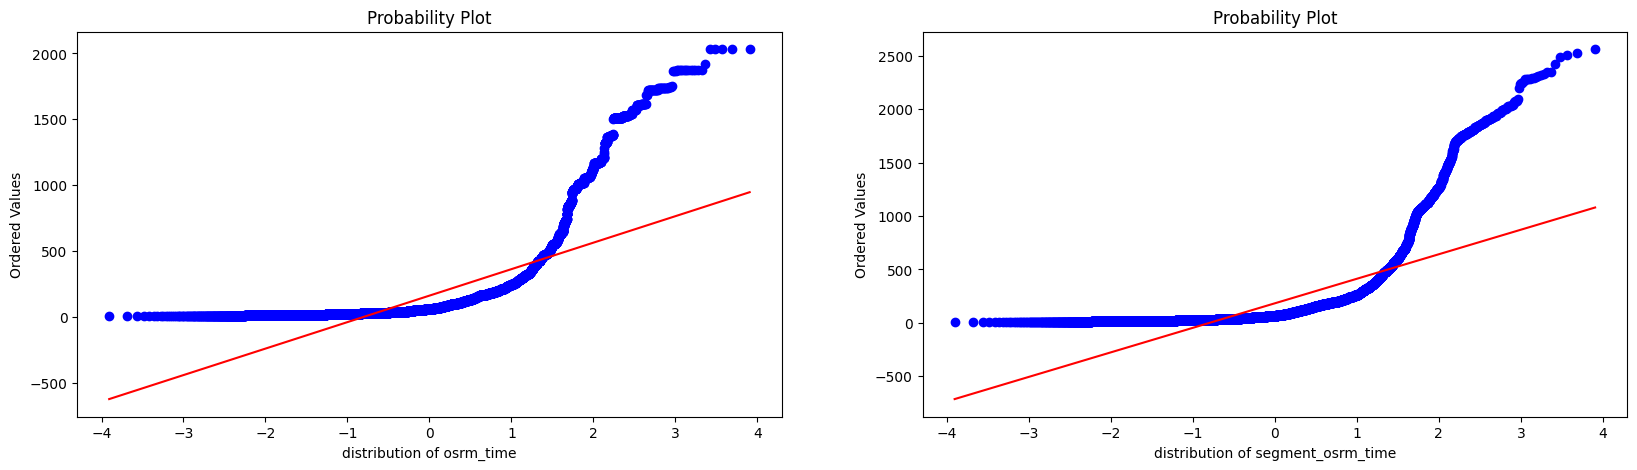

In [209]:
# Validation of Assumption 2 by performing Quantile-Quantile Plot Test:
# H0: The sample has a Gaussian distribution.
# H1: The sample does not have a Gaussian distribution.
d__f_ot=d__f["osrm_time"].sample(14800)
d__f_sot=d__f["segment_osrm_time"].sample(14800)
fig = plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
probplot(d__f_ot,dist="norm",plot=plt)
plt.xlabel('distribution of osrm_time',fontsize=10)
plt.subplot(1, 2, 2)
probplot(d__f_sot,dist="norm",plot=plt)
plt.xlabel('distribution of segment_osrm_time',fontsize=10)
plt.show()

Lambda value used for Transformation of actual time data: -0.2131919445296185
Lambda value used for Transformation of segment actual time data : -0.19181266458171708


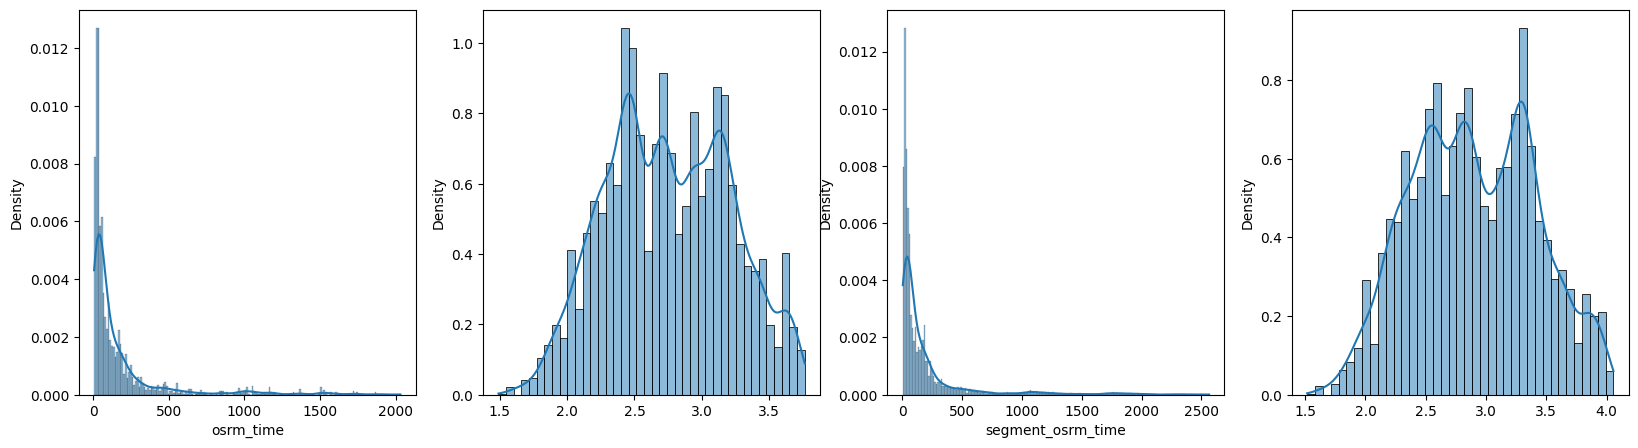

In [210]:
# Transforming data by using boxcox transformation:
original_data1=d__f_ot
fitted_data1, fitted_lambda1 = boxcox(d__f_ot)
original_data2=d__f_sot
fitted_data2, fitted_lambda2 = boxcox(d__f_sot)
fig = plt.figure(figsize=(20,5))
plt.subplot(1, 4, 1)
sns.histplot(original_data1, kde=True, stat="density")
plt.subplot(1, 4, 2)
sns.histplot(fitted_data1, kde=True, stat="density")
print(f"Lambda value used for Transformation of actual time data: {fitted_lambda1}")
plt.subplot(1, 4, 3)
sns.histplot(original_data2, kde=True, stat="density")
plt.subplot(1, 4, 4)
sns.histplot(fitted_data2, kde=True, stat="density")
print(f"Lambda value used for Transformation of segment actual time data : {fitted_lambda2}")
plt.show()

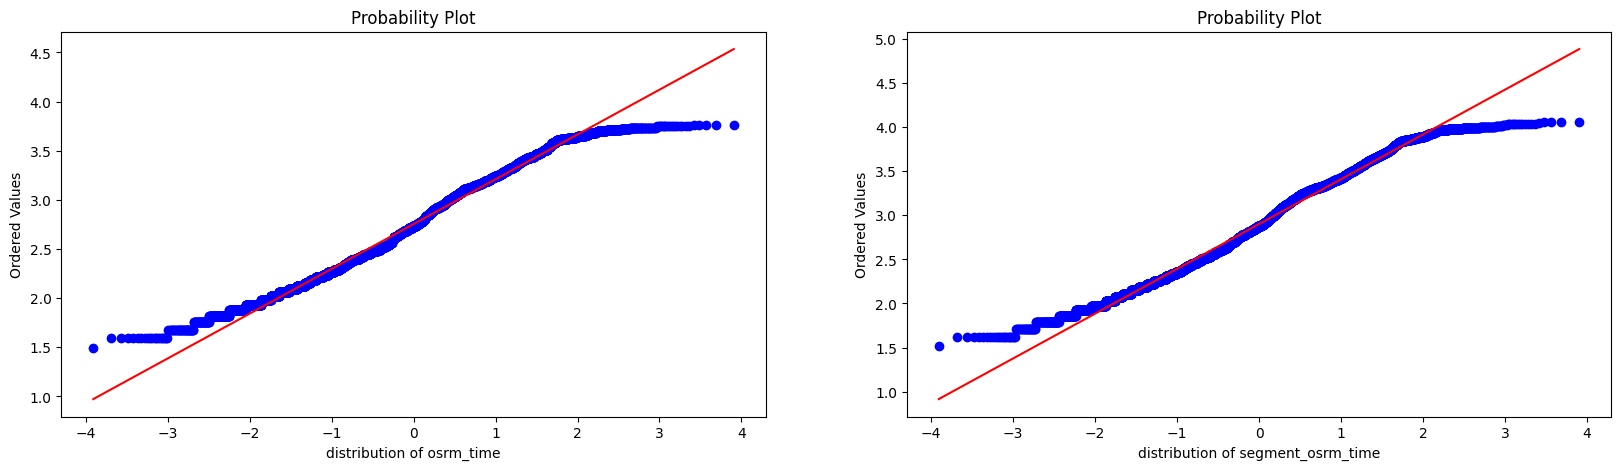

In [211]:
# Quantile-Quantile Plot after data transformation:
fig = plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
probplot(fitted_data1,dist="norm",plot=plt)
plt.xlabel('distribution of osrm_time',fontsize=10)
plt.subplot(1, 2, 2)
probplot(fitted_data2,dist="norm",plot=plt)
plt.xlabel('distribution of segment_osrm_time',fontsize=10)
plt.show()

In [212]:
#  Validation of Assumption 3: 
# H0:variance of the sample is same.
# Ha:variances of the sample is not same.
alpha=0.05
levene_stat,p_value=levene(d__f_ot,d__f_sot)
print("alpha:",0.05)
print("p_value:",p_value)
if p_value<alpha:
  print("Reject Null Hypothesis: Variance of the input datasets is not same")
else:
  print('Accept Null Hypothesis: Variance of the input datasets is Same/Close')

alpha: 0.05
p_value: 8.434382972244705e-08
Reject Null Hypothesis: Variance of the input datasets is not same


### **Observations:**
* As per result of Spearman’s Rank Correlation test, both the samples data are independent.
* It is clear from Kruskal-Wallis H Test, samples are not identically distributed.
* Both sample data are not following normal distribution,it is clear from Q-Q plot.
* After boxcox transformation, it is clear from Q-Q plot, approximately 68% (+-1 sigma) of data points are following normally distribution.   
* From levene test it is clear that,Variance of the samples are not same.

### **Student’s t-test:**
* Tests whether the means of two samples are significantly different.
### **Interpretation:**

* H0: The means of the samples are equal.

* H1: The means of the samples are unequal.

In [213]:
print(d__f["osrm_time"].mean())
print(d__f["segment_osrm_time"].mean())

161.47885135135135
181.05628378378378


In [214]:
# Student’s t-test
d__f_ot=d__f["osrm_time"].sample(14800)
d__f_sot=d__f["segment_osrm_time"].sample(14800)
print("sample size d__f_at :",len(d__f_ot))
print("sample size d__f_sat:",len(d__f_sot))
def t_test(CL):
  alpha=1-(CL/100) # significance level(alpha)
  t_stat,p_value=ttest_rel(d__f_ot,d__f_sot,alternative='less')
  print("Alpha:",alpha)
  print("p value:",p_value)
  print("t statistics:",t_stat)
  if p_value<alpha:
    print("Reject Null Hypothesis: The means of the samples are unequal")
  else:
    print('Accept Null Hypothesis: The means of the samples are equal')
t_test(95)

sample size d__f_at : 14800
sample size d__f_sat: 14800
Alpha: 0.050000000000000044
p value: 5.253736801130438e-09
t statistics: -5.725590783077166
Reject Null Hypothesis: The means of the samples are unequal


### **Observations:**
* The calculated p-value : 5.045903058766468e-09
* Which is lessar than the significance level.
* Null Hypothesis is Rejected.
* The means of the osrm time is lesser than segment osrm time.

### **Outlier Treatment:**

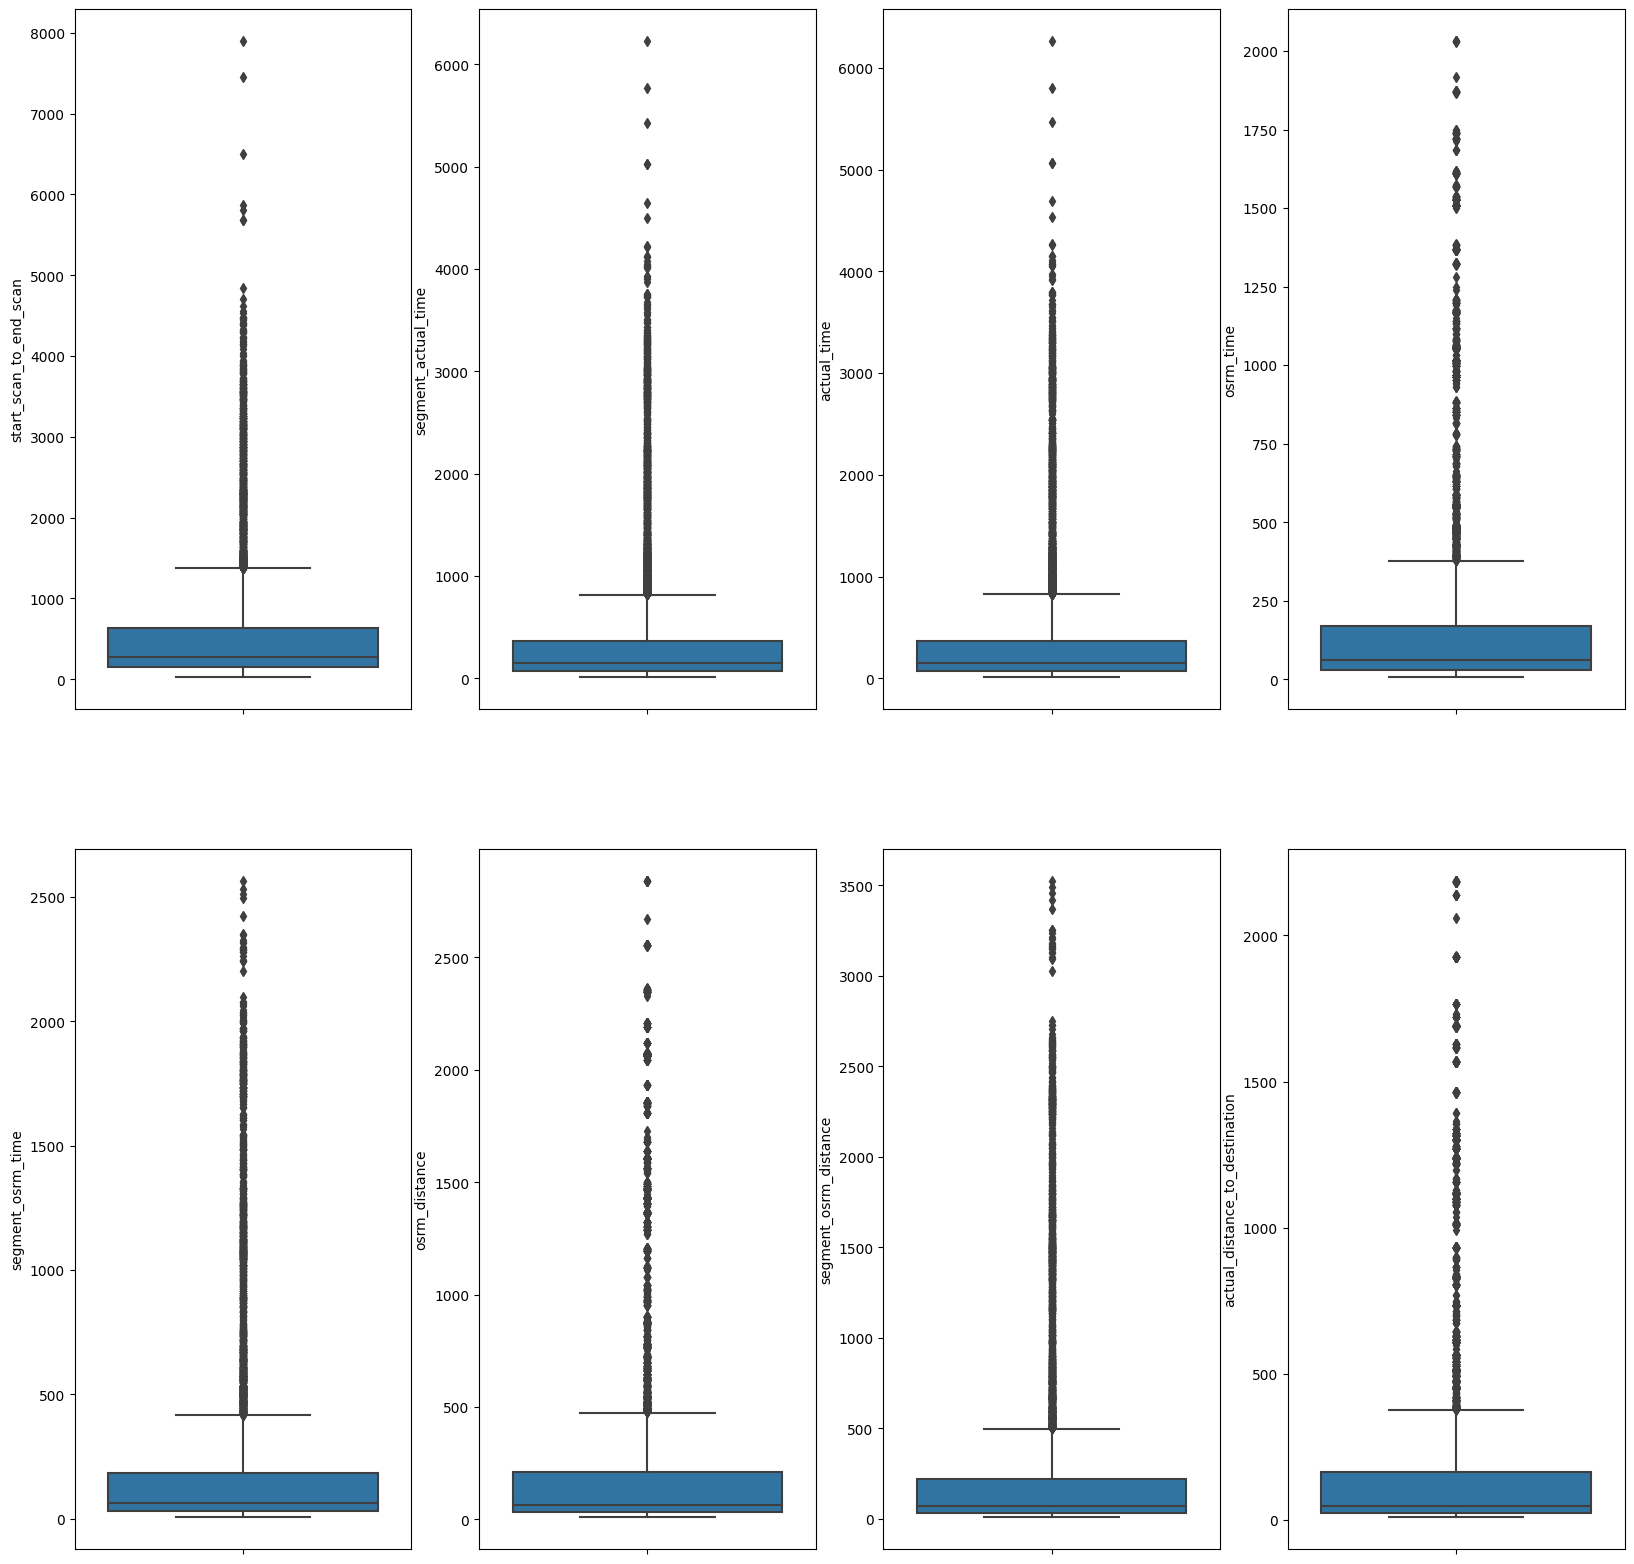

In [215]:
# outlier detection
fig = plt.figure(figsize=(20,20))
plt.subplot(2, 4, 1)
sns.boxplot(data=d__f,y='start_scan_to_end_scan')
plt.subplot(2, 4, 2)
sns.boxplot(data=d__f,y='segment_actual_time')
plt.subplot(2, 4, 3)
sns.boxplot(data=d__f,y='actual_time')
plt.subplot(2, 4, 4)
sns.boxplot(data=d__f,y='osrm_time')
plt.subplot(2, 4, 5)
sns.boxplot(data=d__f,y='segment_osrm_time')
plt.subplot(2, 4, 6)
sns.boxplot(data=d__f,y='osrm_distance')
plt.subplot(2, 4, 7)
sns.boxplot(data=d__f,y='segment_osrm_distance')
plt.subplot(2, 4, 8)
sns.boxplot(data=d__f,y='actual_distance_to_destination')
plt.show()

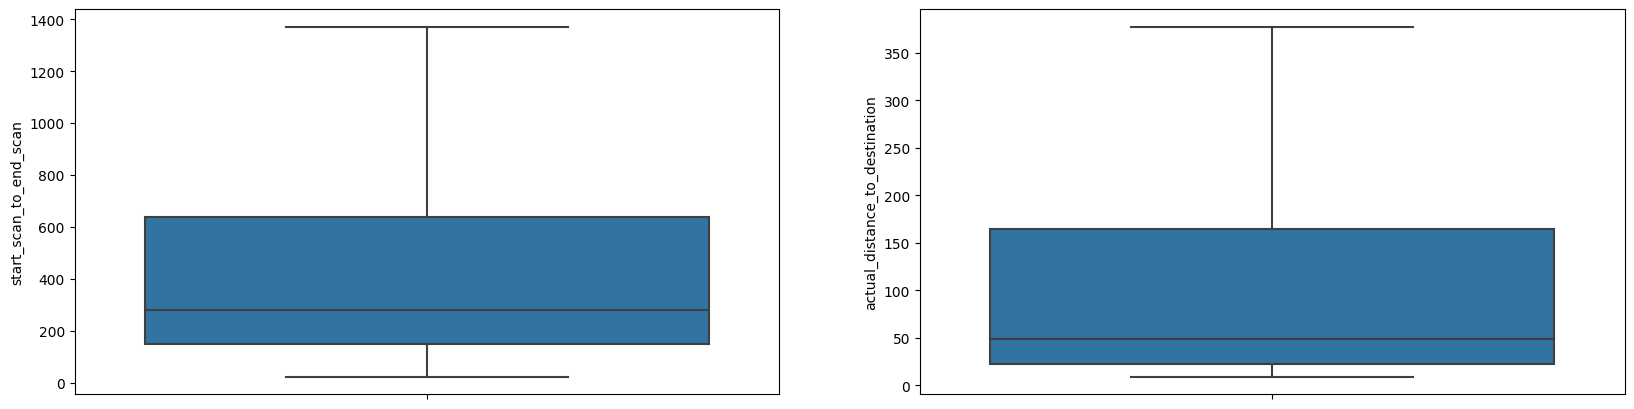

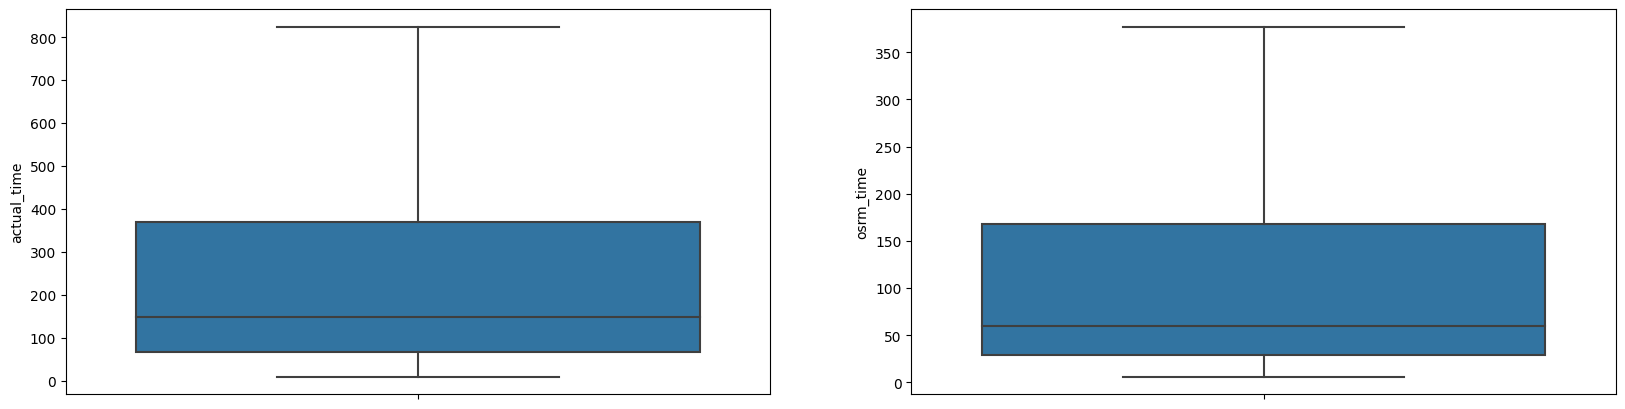

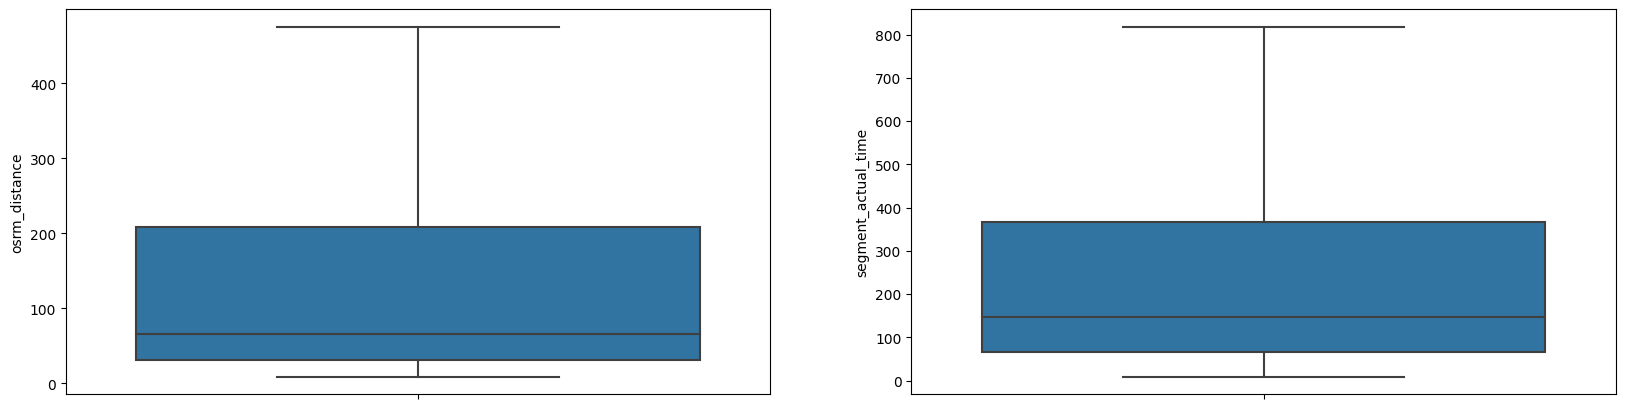

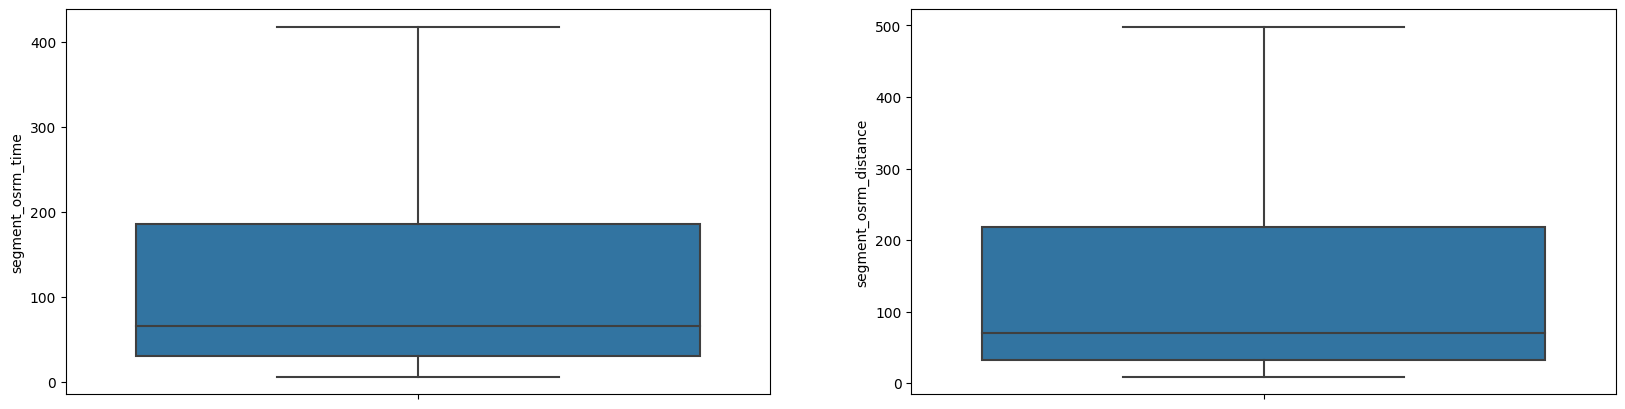

In [216]:
# Outlier Removal:
new_df=d__f.copy()
def outlier(a,b,c,d):
  Q25 = new_df[b].quantile(0.25)
  Q75 = new_df[b].quantile(0.75)
  IQR = Q75-Q25
  fig = plt.figure(figsize=(20,5))
  plt.subplot(1, 2, a)
  new_df.loc[(new_df[b]>(Q75 + 1.5*IQR)),b]=(Q75 + 1.5*IQR)
  new_df.loc[(new_df[b]<(Q25 - 1.5*IQR)),b]=(Q25 - 1.5*IQR)
  sns.boxplot(data=new_df,y=b)
  Q25 = new_df[d].quantile(0.25)
  Q75 = new_df[d].quantile(0.75)
  IQR = Q75-Q25
  plt.subplot(1, 2, c )
  new_df.loc[(new_df[d]>(Q75 + 1.5*IQR)),d]=(Q75 + 1.5*IQR)
  new_df.loc[(new_df[d]<(Q25 - 1.5*IQR)),d]=(Q25 - 1.5*IQR)
  sns.boxplot(data=new_df,y=d)
  plt.show()
outlier(1,'start_scan_to_end_scan',2,'actual_distance_to_destination')
outlier(1,'actual_time',2,'osrm_time')
outlier(1,'osrm_distance',2,'segment_actual_time')
outlier(1,'segment_osrm_time',2,'segment_osrm_distance')

### **Observations:**
* It is clear from boxplot, outlier has been removed.

### **Hot encoding of categorical variables:**


In [217]:
d__f1=d__f.copy()
pd.get_dummies(d__f1, columns = ['data', 'route_type'])

,trip_uuid,source_center,destination_center,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,...,month,year,source_city,source_state,destination_city,destination_state,data_test,data_training,route_type_Carting,route_type_FTL
0,trip-153671041653548748,IND462022AAA,IND000000ACB,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,...,9,2018,Bhopal,Madhya Pradesh,Gurgaon,Haryana,0,1,0,1
1,trip-153671042288605164,IND572101AAA,IND562101AAA,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,...,9,2018,Tumkur,Karnataka,Chikblapur,Karnataka,0,1,1,0
2,trip-153671043369099517,IND562132AAA,IND160002AAC,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,...,9,2018,Bangalore,Karnataka,Chandigarh,Punjab,0,1,0,1
3,trip-153671046011330457,IND400072AAB,IND401104AAA,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,...,9,2018,Mumbai,Maharashtra,Mumbai,Maharashtra,0,1,1,0
4,trip-153671052974046625,IND583101AAA,IND583101AAA,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,...,9,2018,Bellary,Karnataka,Bellary,Karnataka,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,IND160002AAC,IND160002AAC,257.0,57.762332,83.0,62.0,73.4630,82.0,62.0,...,10,2018,Chandigarh,Punjab,Chandigarh,Punjab,1,0,1,0
14813,trip-153861104386292051,IND121004AAB,IND121004AAA,60.0,15.513784,21.0,12.0,16.0882,21.0,11.0,...,10,2018,FBD,Haryana,Faridabad,Haryana,1,0,1,0
14814,trip-153861106442901555,IND209304AAA,IND209304AAA,421.0,38.684839,282.0,48.0,58.9037,281.0,88.0,...,10,2018,Kanpur,Uttar Pradesh,Kanpur,Uttar Pradesh,1,0,1,0
14815,trip-153861115439069069,IND627005AAA,IND627005AAA,347.0,134.723836,264.0,179.0,171.1103,258.0,221.0,...,10,2018,Tirunelveli,Tamil Nadu,Tirunelveli,Tamil Nadu,1,0,1,0


### **Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler:**

In [218]:
# Normalization of numerical data_set
# Using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
d__f1[['start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'diff']]=scaler.fit_transform(d__f1[['start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'diff']])
d__f1

,trip_uuid,data,source_center,destination_center,route_type,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,...,segment_osrm_distance,diff,date,day,month,year,source_city,source_state,destination_city,destination_state
0,trip-153671041653548748,training,IND462022AAA,IND000000ACB,FTL,0.283937,0.374613,0.248242,0.350938,0.346972,...,0.373134,0.284016,2018-09-12,12,9,2018,Bhopal,Madhya Pradesh,Gurgaon,Haryana
1,trip-153671042288605164,training,IND572101AAA,IND562101AAA,Carting,0.019937,0.029476,0.021419,0.030602,0.026859,...,0.021373,0.020082,2018-09-12,12,9,2018,Tumkur,Karnataka,Chikblapur,Karnataka
2,trip-153671043369099517,training,IND562132AAA,IND160002AAC,FTL,0.496508,0.880999,0.533568,0.855874,0.828325,...,0.721625,0.496617,2018-09-12,12,9,2018,Bangalore,Karnataka,Chandigarh,Punjab
3,trip-153671046011330457,training,IND400072AAB,IND401104AAA,Carting,0.009778,0.003753,0.007992,0.004442,0.003747,...,0.003074,0.009782,2018-09-12,12,9,2018,Mumbai,Maharashtra,Mumbai,Maharashtra
4,trip-153671052974046625,training,IND583101AAA,IND583101AAA,FTL,0.088127,0.054395,0.053069,0.054788,0.048647,...,0.039185,0.088239,2018-09-12,12,9,2018,Bellary,Karnataka,Bellary,Karnataka
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,test,IND160002AAC,IND160002AAC,Carting,0.029714,0.022392,0.011829,0.027641,0.022745,...,0.015872,0.048510,2018-10-03,3,10,2018,Chandigarh,Punjab,Chandigarh,Punjab
14813,trip-153861104386292051,test,IND121004AAB,IND121004AAA,Carting,0.004698,0.002990,0.001918,0.002962,0.002478,...,0.001996,0.004715,2018-10-03,3,10,2018,FBD,Haryana,Faridabad,Haryana
14814,trip-153861106442901555,test,IND209304AAA,IND209304AAA,Carting,0.050540,0.013631,0.043638,0.020731,0.017602,...,0.027262,0.050623,2018-10-03,3,10,2018,Kanpur,Uttar Pradesh,Kanpur,Uttar Pradesh
14815,trip-153861115439069069,test,IND627005AAA,IND627005AAA,Carting,0.041143,0.057736,0.040761,0.085390,0.057237,...,0.061020,0.041276,2018-10-03,3,10,2018,Tirunelveli,Tamil Nadu,Tirunelveli,Tamil Nadu


### **Observations:**
* After Normalization of numerical dataset, all values are converted within the new range of 0 and 1.
* It is done by the help of this expression
y = (x – min) / (max – min).

In [219]:
# Using StandardScaler
d__f2=d__f.copy()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
d__f2[['start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'diff']]=scaler.fit_transform(d__f2[['start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'diff']])
d__f2

,trip_uuid,data,source_center,destination_center,route_type,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,...,segment_osrm_distance,diff,date,day,month,year,source_city,source_state,destination_city,destination_state
0,trip-153671041653548748,training,IND462022AAA,IND000000ACB,FTL,2.623454,2.160648,2.145243,2.046199,2.123421,...,2.632098,2.561114,2018-09-12,12,9,2018,Bhopal,Madhya Pradesh,Gurgaon,Haryana
1,trip-153671042288605164,training,IND572101AAA,IND562101AAA,Carting,-0.532810,-0.299138,-0.381574,-0.344319,-0.322100,...,-0.333835,-0.547399,2018-09-12,12,9,2018,Tumkur,Karnataka,Chikblapur,Karnataka
2,trip-153671043369099517,training,IND562132AAA,IND160002AAC,FTL,5.164863,5.769657,5.323797,5.814305,5.800749,...,5.570467,5.065054,2018-09-12,12,9,2018,Bangalore,Karnataka,Chandigarh,Punjab
3,trip-153671046011330457,training,IND400072AAB,IND401104AAA,Carting,-0.654264,-0.482462,-0.531153,-0.539538,-0.498668,...,-0.488126,-0.668714,2018-09-12,12,9,2018,Mumbai,Maharashtra,Mumbai,Maharashtra
4,trip-153671052974046625,training,IND583101AAA,IND583101AAA,FTL,0.282444,-0.121541,-0.028995,-0.163833,-0.155653,...,-0.183647,0.255322,2018-09-12,12,9,2018,Bellary,Karnataka,Bellary,Karnataka
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,test,IND160002AAC,IND160002AAC,Carting,-0.415912,-0.349622,-0.488416,-0.366419,-0.353533,...,-0.380219,-0.212582,2018-10-03,3,10,2018,Chandigarh,Punjab,Chandigarh,Punjab
14813,trip-153861104386292051,test,IND121004AAB,IND121004AAA,Carting,-0.714990,-0.487900,-0.598820,-0.550588,-0.508360,...,-0.497214,-0.728393,2018-10-03,3,10,2018,FBD,Haryana,Faridabad,Haryana
14814,trip-153861106442901555,test,IND209304AAA,IND209304AAA,Carting,-0.166933,-0.412062,-0.134056,-0.417987,-0.392821,...,-0.284181,-0.187705,2018-10-03,3,10,2018,Kanpur,Uttar Pradesh,Kanpur,Uttar Pradesh
14815,trip-153861115439069069,test,IND627005AAA,IND627005AAA,Carting,-0.279277,-0.097729,-0.166109,0.064537,-0.090028,...,0.000459,-0.297789,2018-10-03,3,10,2018,Tirunelveli,Tamil Nadu,Tirunelveli,Tamil Nadu


### **Observations:**
* Standardizing a dataset involves rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1.

### **Business Insights:**
1. Delhivery Bussines case study having 144867 rows and 24 columns.
2. After performing aggregation on dataset,14817 unique trip id has beed found.
3. In this data set, total 868 unique source centre has been detected.
4. Total observed Unique destination centre are 956.
5. Highest order received by Mumbai city.
6. Highest order received by state-wise is Maharashtra.
7. Top 5 source states are Maharashtra, Karnataka, Haryana, Tamil Nadu, and Delhi.
8. Top 5 source cities are Gurgaon, Bengaluru ,Mumbai, Bhiwandi and Bangalore 
9. Busiest corridors are Mumbai to Mumbai having average distance is 16Km taking approximately 63 minutes.
10. Longest Corridor between cities is Guwahati to Bhiwandi having distance of 2140 Km and taking average time around 5457 minutes to delivered order.
11. Based on two sample t-test, there is no significant difference between mean of Actual time and segment actual time.
12. Based on two sample t-test the mean of the difference between order start time to order end time & start scan to end scan is higher.

13. Based on two sample t-test, there is significant difference between mean of  Actual time and osrm time has been observed.
14. Based on two sample t-test, the means of the actual time is significantly greater than  osrm time
15. Based on two sample t-test, there is significant difference between mean of  osrm distance and segment osrm distance has been observed. And mean of segment osrm distance is higher than the osrm distance.
16. Based on two sample t-test, the mean of the osrm time is lesser than segment osrm time.



### **Recommendations:**
1. As the actual time is more than the osrm time therefore scheduling of order has to be done on the basis of actual time.
2. As the segment osrm distance is more than osrm distance trip planning must done by taking care of segment osrm distance. 
2. Proper selections of the distribution centre can reduce average travel time to the customers.
3.  All products picked up at the same source city and destined to the same destination city are aggregated together. 
5. Sometimes there may be need to aggregate not only by distribution pattern but also by logistics characteristics,such as weight and volume.
6. Distribution centers and check points  must be linked with advanced information systems to ensure that all pickups and deliveries are made within the schedule time.